# Importing Schlick Data

Relevant Paper: https://doi.org/10.1093/nar/gkac757 
    

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import mpl_toolkits.mplot3d
import utils
from scipy.spatial.distance import pdist, cdist, squareform
import utility 
from utility import plots_dir
import math

## Global Variables

In [4]:
subdirs = ["26_D", "44_D", "44_S", "70_D", "70_S", "nu_D", "nu_S"]
labels_26bp_D = ["26bp_0_1", "26bp_025_1",  "26bp_05_05",  "26bp_1_025"]
labels_44bp_D = ["44bp_0_1",  "44bp_025_1",  "44bp_05_05",  "44bp_1_025"]
labels_44bp_S = ["44bp_02", "44bp_05", "44bp_08", "44bp_0", "44bp_minus_08", "44bp_plus_08"]
labels_70bp_D = ["70bp_0_1", "70bp_025_1", "70bp_05_05", "70bp_1_025"]   
labels_70bp_S = ["70bp_02"]# , "70bp_08"] #70bp_08 has unresolved problems. Silence for now
labels_nu_D = ["nu_0_1","nu_025_1","nu_05_05","nu_1_025"]
labels_nu_S = ["nu_02", "nu_08", "nu_minus_02", "nu_plus_02"]

end_dirs = [labels_26bp_D, labels_44bp_D, labels_44bp_S, labels_70bp_D, labels_70bp_S, labels_nu_D, labels_nu_S]

files_26bp_D = [i + ".dat" for i in labels_26bp_D]
files_44bp_D = [i + ".dat" for i in labels_44bp_D]
files_44bp_S = [i + ".dat" for i in labels_44bp_S]
files_70bp_D = [i + ".dat" for i in labels_70bp_D]
files_70bp_S = [i + ".dat" for i in labels_70bp_S]
files_nu_D = [i + ".dat" for i in labels_nu_D]
files_nu_S = [i + ".dat" for i in labels_nu_D]

colnames = ["x", "y", "z"]

In [5]:
cores = 100
linkers_26 = 200 # Figured this one out because 9000 lines per snap. (9000-cores*4-cores*(hist_tails+link_hist))/4
linkers_44 = 400
linkers_70 = 700
linkers_nu = 414
hist_tails = 50
link_hist = 28
linker_array = [linkers_26, linkers_44, linkers_44, linkers_70, linkers_70, linkers_nu, linkers_nu]
total_snaps = 1000

In [6]:
schlick_folder = '/ru-auth/local/home/abrenner/myscratch/data_from_schlick/'
data_dir = "/lustre/fs4/risc_lab/store/risc_data/downloaded/schlick_coordinates/Trajectories/"

In [5]:
# traj = pd.read_csv(data_dir + subdirs[1] + "/44bp_05.dat",
#             header=None, sep='\s\s+', engine='python', names=colnames)

#### From Supplementary Material Table S2

In [6]:
non_uniform_spacing = [44, 80, 35, 26, 26, 70, 70, 62, 35, 26, 26, 44, 35, 53, 62, 44, 62, 53, 80, 35, 53, 80, 62, 53, 44, 26, 26, 35, 70, 44, 44, 26, 62, 26, 53, 26, 70, 35, 26, 80, 44, 80, 26, 26, 26, 53, 44, 70, 26, 80, 26, 44, 26, 53, 62, 35, 35, 26, 26, 62, 80, 26, 26, 35, 70, 35, 70, 44, 44, 26, 35, 26, 26, 26, 53, 35, 26, 80, 53, 35, 26, 35, 62, 35, 44, 35, 44, 35, 26, 26, 53, 80, 44, 53, 80, 53, 35, 26, 26, 70]

In [ ]:
# first_snap = traj[3*lines_per_snap:4*lines_per_snap]

In [ ]:
# cores_and_links = first_snap[:core_link_end_idx]
# cores_and_links

In [ ]:
# core_link_end_idx = 4*(cores+linkers)
# cores_and_links = first_snap[:core_link_end_idx]
# tails_and_h1 = first_snap[core_link_end_idx:]
# tail_pos = tails_and_h1[:hist_tails*cores]
# h1_pos = tails_and_h1[hist_tails*cores:]

In [ ]:
# # core_link_end_idx = 4*(cores+linkers)
# core_link_end_idx

In [ ]:
# h1_pos_new = h1_pos[np.abs(h1_pos.x) > 0 ]

In [ ]:
# positions = cores_and_links[::4]
# orientation1 = cores_and_links[1::4]
# orientation2 = cores_and_links[2::4]
# orientation3 = cores_and_links[3::4]

In [ ]:
# core_pos = positions[:cores]
# core_orientation1 = orientation1[:cores]
# core_orientation1 = orientation2[:cores]
# core_orientation1 = orientation3[:cores]

In [ ]:
# link_pos = positions[cores:cores+linkers]
# link_orientation1 = orientation1[cores:cores+linkers]
# link_orientation1 = orientation2[cores:cores+linkers]
# link_orientation1 = orientation3[cores:cores+linkers]

In [ ]:
# startidx = cores+linkers
# endidx = cores+linkers+cores*hist_tails
# tail_pos = positions[startidx:endidx]
# h1_pos = positions[endidx: endidx+cores*link_hist]


In [ ]:
# from mpl_toolkits.mplot3d import Axes3D
# %matplotlib notebook

In [ ]:
# # def randrange(n, vmin, vmax):
# #     '''
# #     Helper function to make an array of random numbers having shape (n, )
# #     with each number distributed Uniform(vmin, vmax).
# #     '''
# #     return (vmax - vmin)*np.random.rand(n) + vmin
# subset = 100
# my_cmap = plt.get_cmap('hsv')
# fig = plt.figure()
# # ax = fig.add_subplot(111, projection='3d')
# ax = fig.gca(projection='3d')
# linkers_per_core = linkers/cores
# m = cm.ScalarMappable(cmap=cm.jet)
# coresplotted = ax.scatter(core_pos.x, core_pos.y, core_pos.z, s = 50, c = "darkgrey")#, marker='hexagon2')
# # tailsplotted = ax.scatter(tail_pos.x, tail_pos.y, tail_pos.z, s = 1, c = "green", alpha=0.1)
# h1plotted = ax.scatter(h1_pos_new.x, h1_pos_new.y, h1_pos_new.z, s = 10, c = "red", alpha=0.1)
# # linkersplotted = ax.scatter(link_pos.x[:subset*4], link_pos.y[:subset*4], link_pos.z[:subset*4], c = (link_pos.x[:subset*4] + link_pos.y[:subset*4] + link_pos.z[:subset*4]), cmap=my_cmap,marker='.')

# # plt.colorbar(linkersplotted)
# # jet()

# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

# plt.show()


In [7]:
def write_pdb_lines(arr, name, connect=None):
    N = len(arr[:,0]) #number of beads
    #Nucleosome Cores
    #Define default values if None given for atom specifiers
    Atom = [name for i in range(N)]
    serial = [i for i in range(N)]
    b = np.zeros(N)
    occup = np.ones(N)
    chain = ['A' for i in range(N)]
    res = ['DNA' for i in range(N)]
    element = ['C' for i in range(N)]
    
    #Initialize list of lines
    lines = []
    #loop over atoms
    for i in range(N):
        line = 'ATOM'.ljust(6)
        line += ('%s' %serial[i]).rjust(5)
        line += ('%s' %Atom[i]).rjust(5)
        line += ' '
        line += ('%s' %res[i]).rjust(3)
        line += ('%s' %chain[i]).rjust(2)
        line += ' '*8
        line += ('%.1f' % arr[i,0]).rjust(8)
        line += ('%.1f' % arr[i,1]).rjust(8)
        line += ('%.1f' % arr[i,2]).rjust(8)
        line += ('%.1f' % occup[i]).rjust(6)
        line += ('%.1f' % b[i]).rjust(6)
        line += element[i].rjust(12) 
        lines.append(line)
    return lines

In [8]:
def mkpdb(core_arr, link_arr, tail_arr, h1_arr, connect = None, topology = 'linear'):
    lines_cores = write_pdb_lines(core_arr, "C1")
    lines_linkers = write_pdb_lines(link_arr, "D1")
    lines_tails = write_pdb_lines(tail_arr, "T1")
    lines_h1 = write_pdb_lines(h1_arr, "H1")
#     N = len(lines_cores) + len(lines_linkers)
    #If no connectivity set is given, adjacent beads are connected while respecting topology
#     if connect is None:
#         connect = [(i,i+1) for i in range(N-1)]
#         if topology == 'circular':
#             connect.append((N-1,0))
    
    lines = lines_cores + lines_linkers + lines_tails + lines_h1
#     #loop over connections
#     for i,c in enumerate(connect):
#         line = 'CONECT'.rjust(6)
#         line += ('%s' %c[0]).rjust(5)
#         line += ('%s' %c[0]).rjust(5) 
#         line += ('%s' %c[1]).rjust(5)
#         lines.append(line)
#     lines.append('END')
    #return list of lines
    return lines


In [9]:
#################################################################
#Save a pdb file, given a list of lines
##################################################################
#inputs
#save_file - string containing file name
#lines - list of strings, each corresponding to a line of the pdb
#as generated by mk_pdb

def save_pdb(save_file,lines):
    with open(save_file, 'w') as f:
        for line in lines:
            f.write(line  + '\n')

In [10]:
# save_pdb(schlick_folder+'0_temp.pdb', mkpdb(np.array(core_pos),np.array(link_pos)))

In [11]:
# mkpdb(np.array(core_pos),np.array(link_pos), connect=None)

In [9]:
def snapshot_coords(complete_df, snapshot = 0, fp = None, linkers = None):
    """
    Return dataframes with the relevant coordinates
    FILEPATH ISSUES TO FIX
    """
    lines_per_snap = cores*4+linkers*4+cores*(hist_tails+link_hist)
    snap = complete_df[snapshot*lines_per_snap:(1+snapshot)*lines_per_snap]
#     print("df_snap_"+str(snapshot)+".csv")
    snap.to_csv(fp + "dfs/df_snap_"+str(snapshot)+".csv")
    core_link_end_idx = 4*(cores+linkers)
    # Could add labels to the dataframes here if it will be helpful later
    cores_and_links = snap[:core_link_end_idx]
    tails_and_h1 = snap[core_link_end_idx:]
    tails_df = tails_and_h1[:hist_tails*cores]
    h1_pos = tails_and_h1[hist_tails*cores:]
    # Many h1 values are zero across the 
    # board, we can get rid of these so there arent coords at the origin
    h1_df = h1_pos[np.abs(h1_pos.x) > 0 ]
    
    # Get mod 4 positions
    positions = cores_and_links[::4]
#     orientation1 = cores_and_links[1::4]
#     orientation2 = cores_and_links[2::4]
#     orientation3 = cores_and_links[3::4]

    cores_df = positions[:cores]
    linkers_df = positions[cores:]
    
    return cores_df, linkers_df, tails_df, h1_df

In [10]:
def linker_w_frames(link_df, snapshot = 0, linkers=None):
    """
    Only Works for uniform linkers
    """
    repeat_every = linkers/cores
    linker_index_pre = [list(np.repeat(idx, repeat_every)) for idx in range(0,cores)]
    first_flag_pre = [[idx+1] + list(np.repeat(0, repeat_every-1)) for idx in range(0,cores)]
    last_flag_pre = [list(np.repeat(0, repeat_every-1)) + [idx+1] for idx in range(0,cores)]

    #flatten
    linker_index = [item for sublist in linker_index_pre for item in sublist]
    first_flag = [item for sublist in first_flag_pre for item in sublist]
    last_flag = [item for sublist in last_flag_pre for item in sublist]
    link_df["link_idx"] = linker_index
    link_df["first_bead"] = first_flag
    link_df["last_bead"] = last_flag
    return link_df

In [14]:
# cores_per_snap, linkers_per_snap, tails_per_snap , h1_per_snap = snapshot_coords(traj, snapshot = 0, linkers = linkers=linkers_44)

In [15]:
# tester = linker_w_frames(linkers_per_snap)
# example_first_beads = tester[tester.first_bead > 0]
# example_last_beads = tester[tester.last_bead > 0]

## Save pdb files for viewing

In [16]:
# total_snaps = 1000
# for s in range(total_snaps):
#     mid_dir = '44_bp/'
#     cores_per_snap, linkers_per_snap, tails_per_snap, h1_per_snap = snapshot_coords(traj, snapshot = s, mid_folder = mid_dir, linkers = linkers_44)
#     linker_df_flagged = linker_w_frames(linkers_per_snap, snapshot = s, mid_folder = mid_dir, linkers = linkers_44)
#     linker_df_flagged.to_csv(schlick_folder+mid_dir+"dfs/flagged_linkers_"+str(s)+"snap.csv")
#     to_save = mkpdb(np.array(cores_per_snap),np.array(linkers_per_snap), np.array(tails_per_snap),np.array(h1_per_snap))
#     save_pdb(schlick_folder+mid_dir+"snapshots/"+str(s)+'_snapshot.pdb', to_save)    

In [19]:
# # Plot example of coordinates
# subset = 5
# xs = list(cores_per_snap.x)
# ys = list(cores_per_snap.y)
# zs = list(cores_per_snap.z)
# color_choices = ['red', 'orange', 'goldenrod', 'green', 'blue', 'indigo', 'violet', 'dark_violet']
# my_cmap = plt.get_cmap('hsv')
# fig = plt.figure()
# # ax = fig.add_subplot(111, projection='3d')
# ax = fig.gca(projection='3d')
# # linkers_per_core = linkers/cores
# m = cm.ScalarMappable(cmap=cm.jet)
# # coresplotted = ax.scatter(cores_per_snap.x[:subset], cores_per_snap.y[:subset], cores_per_snap.z[:subset], s = 50, c = "darkgrey")#, marker='hexagon2')
# # tailsplotted = ax.scatter(tails_per_snap.x[], tails_per_snap.y, tails_per_snap.z, s = 1, c = "green", alpha=0.1)
# # h1plotted = ax.scatter(h1_per_snap.x, h1_per_snap.y, h1_per_snap.z, s = 10, c = "red", alpha=0.1)
# for num in range(0, subset):
#     linkersplotted = ax.scatter(linkers_per_snap.x[num*4:(num+1)*4], linkers_per_snap.y[num*4:(num+1)*4], linkers_per_snap.z[num*4:(num+1)*4], c = color_choices[num])
#     coresplotted = ax.scatter(xs[num], ys[num], zs[num], s = 200, c = color_choices[num])
# ax.scatter(example_first_beads.x[:subset],example_first_beads.y[:subset], example_first_beads.z[:subset], marker = '*', s = 50)
# ax.scatter(example_last_beads.x[:subset],example_last_beads.y[:subset], example_last_beads.z[:subset], marker = '^', s = 50)
# # linkersplotted = ax.scatter(linkers_per_snap.x[4:8], linkers_per_snap.y[4:8], linkers_per_snap.z[4:8], c = 'orange')#(linkers_per_snap.x + linkers_per_snap.y + linkers_per_snap.z), cmap=my_cmap,marker='.')

# # # plt.colorbar(linkersplotted)
# # # jet()

# # ax.set_xlabel('X Label')
# # ax.set_ylabel('Y Label')
# # ax.set_zlabel('Z Label')

# plt.show()


# Draw in data for 70bp 

In [20]:
# traj_70 = pd.read_csv(data_dir + subdirs[2] + "/70bp_02.dat",
#             header=None, sep='\s\s+', engine='python', names=colnames)

In [21]:
# cores = 100
# linkers = 700
# hist_tails = 50
# link_hist = 28
# lines_per_snap = cores*4+linkers*4+cores*(hist_tails+link_hist)
# expected_70bp_lines = 11000
# lines_per_snap == expected_70bp_lines

In [22]:
# total_snaps = 1000
# for s in range(total_snaps):
#     mid_dir = '70_S/'
#     cores_per_snap, linkers_per_snap, tails_per_snap, h1_per_snap = snapshot_coords(traj_70, snapshot = s, mid_folder = mid_dir)
#     linker_df_flagged = linker_w_frames(linkers_per_snap, snapshot = s, mid_folder = mid_dir)
#     linker_df_flagged.to_csv(schlick_folder+mid_dir+"dfs/flagged_linkers_"+str(s)+"snap.csv")
#     to_save = mkpdb(np.array(cores_per_snap),np.array(linkers_per_snap), np.array(tails_per_snap),np.array(h1_per_snap))
#     save_pdb(schlick_folder+"70_S/snapshots/"+str(s)+'_snapshot.pdb', to_save)  

In [23]:
# total_snaps = 1000
# for s in range(total_snaps):
#     mid_dir = '70_S/'
#     cores_per_snap, linkers_per_snap, tails_per_snap, h1_per_snap = snapshot_coords(traj_70, snapshot = s, mid_folder = mid_dir, linkers = linkers_70)
#     linker_df_flagged = linker_w_frames(linkers_per_snap, snapshot = s, mid_folder = mid_dir, linkers = linkers_70)
#     linker_df_flagged.to_csv(schlick_folder+mid_dir+"dfs/flagged_linkers_"+str(s)+"snap.csv")
#     to_save = mkpdb(np.array(cores_per_snap),np.array(linkers_per_snap), np.array(tails_per_snap),np.array(h1_per_snap))
#     save_pdb(schlick_folder+mid_dir+"snapshots/"+str(s)+'_snapshot.pdb', to_save)  

# Draw in Data for Non-Uniform

In [24]:
# cores = 100
# linkers = 414
# hist_tails = 50
# link_hist = 28
# lines_per_snap = cores*4+linkers*4+cores*(hist_tails+link_hist)
# expected_70bp_lines = 9856
# lines_per_snap == expected_70bp_lines

In [25]:
# traj_nu = pd.read_csv(data_dir + subdirs[3] + "/nu_minus_02.dat",
#             header=None, sep='\s\s+', engine='python', names=colnames)

In [26]:
# total_snaps = 1000
# for s in range(total_snaps):
#     mid_dir = 'nu_S/'
#     cores_per_snap, linkers_per_snap, tails_per_snap, h1_per_snap = snapshot_coords(traj_nu, snapshot = s, mid_folder = mid_dir, linkers = linkers_nu)
# #     linker_df_flagged = linker_w_frames(linkers_per_snap, snapshot = s, mid_folder = mid_dir, linkers = linkers_nu)
# #     linker_df_flagged.to_csv(schlick_folder+mid_dir+"dfs/flagged_linkers_"+str(s)+"snap.csv")
#     to_save = mkpdb(np.array(cores_per_snap),np.array(linkers_per_snap), np.array(tails_per_snap),np.array(h1_per_snap))
#     save_pdb(schlick_folder+mid_dir+"snapshots/"+str(s)+'_snapshot.pdb', to_save)  

# We do not know how many beads oer snap in this situation -- maybe check the paper

In [27]:
# linkers_per_snap

May be a good idea to calculate euclidean distance between lagged rows. There should be 2 diff values, one about 1helix, the other the dist between entry and exit

# Draw in data for 26bp

In [28]:
# traj_26_025_1 = pd.read_csv(data_dir + subdirs[0] + "/26bp_025_1.dat",
#             header=None, sep='\s\s+', engine='python', names=colnames)
# traj_26_05_05 = pd.read_csv(data_dir + subdirs[0] + "/26bp_05_05.dat",
#             header=None, sep='\s\s+', engine='python', names=colnames)

In [29]:
# total_snaps = 1000
# for s in range(total_snaps):
#     mid_dir = '26_D_025_1/'
#     cores_per_snap, linkers_per_snap, tails_per_snap, h1_per_snap = snapshot_coords(traj_26_025_1, snapshot = s, mid_folder = mid_dir, linkers = linkers_26)
#     linker_df_flagged = linker_w_frames(linkers_per_snap, snapshot = s, mid_folder = mid_dir, linkers = linkers_26)
#     linker_df_flagged.to_csv(schlick_folder+mid_dir+"dfs/flagged_linkers_"+str(s)+"snap.csv")
#     to_save = mkpdb(np.array(cores_per_snap),np.array(linkers_per_snap), np.array(tails_per_snap),np.array(h1_per_snap))
#     save_pdb(schlick_folder+mid_dir+"snapshots/"+str(s)+'_snapshot.pdb', to_save)  

In [30]:
# total_snaps = 1000
# for s in range(total_snaps):
#     mid_dir = '26_D_05_05/'
#     cores_per_snap, linkers_per_snap, tails_per_snap, h1_per_snap = snapshot_coords(traj_26_05_05, snapshot = s, mid_folder = mid_dir, linkers = linkers_26)
#     linker_df_flagged = linker_w_frames(linkers_per_snap, snapshot = s, mid_folder = mid_dir, linkers = linkers_26)
#     linker_df_flagged.to_csv(schlick_folder+mid_dir+"dfs/flagged_linkers_"+str(s)+"snap.csv")
#     to_save = mkpdb(np.array(cores_per_snap),np.array(linkers_per_snap), np.array(tails_per_snap),np.array(h1_per_snap))
#     save_pdb(schlick_folder+mid_dir+"snapshots/"+str(s)+'_snapshot.pdb', to_save)  

# Draw in all data in one fell swoop

In [37]:
for i in range(5,len(subdirs)): # Change 4 to 0, only doing like this due to interuption
    num_sub_dirs = len(end_dirs[i])
    for d in range(0,num_sub_dirs):
        out_path = schlick_folder + subdirs[i] + "/" + end_dirs[i][d] + "/"
        in_path = data_dir + subdirs[i] + "/" + end_dirs[i][d] + ".dat"
        print("Loading Data from ..." + in_path)
        # usecols=[0,1,2] Ignores laters columns
        # This appears to only be a problem for 70_S/70bp_08.dat in line 4575949
        # where there are 6 columns
        trajectory = pd.read_csv(in_path, header=None, sep='\s\s+', engine='python', names=colnames, usecols=[0,1,2])
        for s in range(total_snaps):  
            
            print("Getting snapshot coords for snapshot:   " + str(s))
            cores_per_snap, linkers_per_snap, tails_per_snap, h1_per_snap = snapshot_coords(trajectory, snapshot = s, fp = out_path, linkers = linker_array[i])
            
            print("Saving PDB")
            to_save = mkpdb(np.array(cores_per_snap),np.array(linkers_per_snap), np.array(tails_per_snap),np.array(h1_per_snap))
            save_pdb(out_path + "snapshots/"+str(s)+'_snapshot.pdb', to_save)  
            
            # nonuniform linkers require special handling
            if i > 4:
                continue
            
            else: 
                print("Flagging first and last linkers")
                linker_df_flagged = linker_w_frames(linkers_per_snap, snapshot = s, linkers = linker_array[i])
                linker_df_flagged.to_csv(out_path + "dfs/flagged_linkers_"+str(s)+"snap.csv")

        print("Writing output to ... " + out_path)

Loading Data from .../lustre/fs4/risc_lab/store/risc_data/downloaded/schlick_coordinates/Trajectories/nu_D/nu_0_1.dat
Getting snapshot coords for snapshot:   0
Saving PDB
Getting snapshot coords for snapshot:   1
Saving PDB
Getting snapshot coords for snapshot:   2
Saving PDB
Getting snapshot coords for snapshot:   3
Saving PDB
Getting snapshot coords for snapshot:   4
Saving PDB
Getting snapshot coords for snapshot:   5
Saving PDB
Getting snapshot coords for snapshot:   6
Saving PDB
Getting snapshot coords for snapshot:   7
Saving PDB
Getting snapshot coords for snapshot:   8
Saving PDB
Getting snapshot coords for snapshot:   9
Saving PDB
Getting snapshot coords for snapshot:   10
Saving PDB
Getting snapshot coords for snapshot:   11
Saving PDB
Getting snapshot coords for snapshot:   12
Saving PDB
Getting snapshot coords for snapshot:   13
Saving PDB
Getting snapshot coords for snapshot:   14
Saving PDB
Getting snapshot coords for snapshot:   15
Saving PDB
Getting snapshot coords for 

Saving PDB
Getting snapshot coords for snapshot:   150
Saving PDB
Getting snapshot coords for snapshot:   151
Saving PDB
Getting snapshot coords for snapshot:   152
Saving PDB
Getting snapshot coords for snapshot:   153
Saving PDB
Getting snapshot coords for snapshot:   154
Saving PDB
Getting snapshot coords for snapshot:   155
Saving PDB
Getting snapshot coords for snapshot:   156
Saving PDB
Getting snapshot coords for snapshot:   157
Saving PDB
Getting snapshot coords for snapshot:   158
Saving PDB
Getting snapshot coords for snapshot:   159
Saving PDB
Getting snapshot coords for snapshot:   160
Saving PDB
Getting snapshot coords for snapshot:   161
Saving PDB
Getting snapshot coords for snapshot:   162
Saving PDB
Getting snapshot coords for snapshot:   163
Saving PDB
Getting snapshot coords for snapshot:   164
Saving PDB
Getting snapshot coords for snapshot:   165
Saving PDB
Getting snapshot coords for snapshot:   166
Saving PDB
Getting snapshot coords for snapshot:   167
Saving PDB

Getting snapshot coords for snapshot:   299
Saving PDB
Getting snapshot coords for snapshot:   300
Saving PDB
Getting snapshot coords for snapshot:   301
Saving PDB
Getting snapshot coords for snapshot:   302
Saving PDB
Getting snapshot coords for snapshot:   303
Saving PDB
Getting snapshot coords for snapshot:   304
Saving PDB
Getting snapshot coords for snapshot:   305
Saving PDB
Getting snapshot coords for snapshot:   306
Saving PDB
Getting snapshot coords for snapshot:   307
Saving PDB
Getting snapshot coords for snapshot:   308
Saving PDB
Getting snapshot coords for snapshot:   309
Saving PDB
Getting snapshot coords for snapshot:   310
Saving PDB
Getting snapshot coords for snapshot:   311
Saving PDB
Getting snapshot coords for snapshot:   312
Saving PDB
Getting snapshot coords for snapshot:   313
Saving PDB
Getting snapshot coords for snapshot:   314
Saving PDB
Getting snapshot coords for snapshot:   315
Saving PDB
Getting snapshot coords for snapshot:   316
Saving PDB
Getting sn

Saving PDB
Getting snapshot coords for snapshot:   450
Saving PDB
Getting snapshot coords for snapshot:   451
Saving PDB
Getting snapshot coords for snapshot:   452
Saving PDB
Getting snapshot coords for snapshot:   453
Saving PDB
Getting snapshot coords for snapshot:   454
Saving PDB
Getting snapshot coords for snapshot:   455
Saving PDB
Getting snapshot coords for snapshot:   456
Saving PDB
Getting snapshot coords for snapshot:   457
Saving PDB
Getting snapshot coords for snapshot:   458
Saving PDB
Getting snapshot coords for snapshot:   459
Saving PDB
Getting snapshot coords for snapshot:   460
Saving PDB
Getting snapshot coords for snapshot:   461
Saving PDB
Getting snapshot coords for snapshot:   462
Saving PDB
Getting snapshot coords for snapshot:   463
Saving PDB
Getting snapshot coords for snapshot:   464
Saving PDB
Getting snapshot coords for snapshot:   465
Saving PDB
Getting snapshot coords for snapshot:   466
Saving PDB
Getting snapshot coords for snapshot:   467
Saving PDB

Saving PDB
Getting snapshot coords for snapshot:   601
Saving PDB
Getting snapshot coords for snapshot:   602
Saving PDB
Getting snapshot coords for snapshot:   603
Saving PDB
Getting snapshot coords for snapshot:   604
Saving PDB
Getting snapshot coords for snapshot:   605
Saving PDB
Getting snapshot coords for snapshot:   606
Saving PDB
Getting snapshot coords for snapshot:   607
Saving PDB
Getting snapshot coords for snapshot:   608
Saving PDB
Getting snapshot coords for snapshot:   609
Saving PDB
Getting snapshot coords for snapshot:   610
Saving PDB
Getting snapshot coords for snapshot:   611
Saving PDB
Getting snapshot coords for snapshot:   612
Saving PDB
Getting snapshot coords for snapshot:   613
Saving PDB
Getting snapshot coords for snapshot:   614
Saving PDB
Getting snapshot coords for snapshot:   615
Saving PDB
Getting snapshot coords for snapshot:   616
Saving PDB
Getting snapshot coords for snapshot:   617
Saving PDB
Getting snapshot coords for snapshot:   618
Saving PDB

Saving PDB
Getting snapshot coords for snapshot:   752
Saving PDB
Getting snapshot coords for snapshot:   753
Saving PDB
Getting snapshot coords for snapshot:   754
Saving PDB
Getting snapshot coords for snapshot:   755
Saving PDB
Getting snapshot coords for snapshot:   756
Saving PDB
Getting snapshot coords for snapshot:   757
Saving PDB
Getting snapshot coords for snapshot:   758
Saving PDB
Getting snapshot coords for snapshot:   759
Saving PDB
Getting snapshot coords for snapshot:   760
Saving PDB
Getting snapshot coords for snapshot:   761
Saving PDB
Getting snapshot coords for snapshot:   762
Saving PDB
Getting snapshot coords for snapshot:   763
Saving PDB
Getting snapshot coords for snapshot:   764
Saving PDB
Getting snapshot coords for snapshot:   765
Saving PDB
Getting snapshot coords for snapshot:   766
Saving PDB
Getting snapshot coords for snapshot:   767
Saving PDB
Getting snapshot coords for snapshot:   768
Saving PDB
Getting snapshot coords for snapshot:   769
Saving PDB

Saving PDB
Getting snapshot coords for snapshot:   901
Saving PDB
Getting snapshot coords for snapshot:   902
Saving PDB
Getting snapshot coords for snapshot:   903
Saving PDB
Getting snapshot coords for snapshot:   904
Saving PDB
Getting snapshot coords for snapshot:   905
Saving PDB
Getting snapshot coords for snapshot:   906
Saving PDB
Getting snapshot coords for snapshot:   907
Saving PDB
Getting snapshot coords for snapshot:   908
Saving PDB
Getting snapshot coords for snapshot:   909
Saving PDB
Getting snapshot coords for snapshot:   910
Saving PDB
Getting snapshot coords for snapshot:   911
Saving PDB
Getting snapshot coords for snapshot:   912
Saving PDB
Getting snapshot coords for snapshot:   913
Saving PDB
Getting snapshot coords for snapshot:   914
Saving PDB
Getting snapshot coords for snapshot:   915
Saving PDB
Getting snapshot coords for snapshot:   916
Saving PDB
Getting snapshot coords for snapshot:   917
Saving PDB
Getting snapshot coords for snapshot:   918
Saving PDB

Saving PDB
Getting snapshot coords for snapshot:   48
Saving PDB
Getting snapshot coords for snapshot:   49
Saving PDB
Getting snapshot coords for snapshot:   50
Saving PDB
Getting snapshot coords for snapshot:   51
Saving PDB
Getting snapshot coords for snapshot:   52
Saving PDB
Getting snapshot coords for snapshot:   53
Saving PDB
Getting snapshot coords for snapshot:   54
Saving PDB
Getting snapshot coords for snapshot:   55
Saving PDB
Getting snapshot coords for snapshot:   56
Saving PDB
Getting snapshot coords for snapshot:   57
Saving PDB
Getting snapshot coords for snapshot:   58
Saving PDB
Getting snapshot coords for snapshot:   59
Saving PDB
Getting snapshot coords for snapshot:   60
Saving PDB
Getting snapshot coords for snapshot:   61
Saving PDB
Getting snapshot coords for snapshot:   62
Saving PDB
Getting snapshot coords for snapshot:   63
Saving PDB
Getting snapshot coords for snapshot:   64
Saving PDB
Getting snapshot coords for snapshot:   65
Saving PDB
Getting snapshot 

Saving PDB
Getting snapshot coords for snapshot:   199
Saving PDB
Getting snapshot coords for snapshot:   200
Saving PDB
Getting snapshot coords for snapshot:   201
Saving PDB
Getting snapshot coords for snapshot:   202
Saving PDB
Getting snapshot coords for snapshot:   203
Saving PDB
Getting snapshot coords for snapshot:   204
Saving PDB
Getting snapshot coords for snapshot:   205
Saving PDB
Getting snapshot coords for snapshot:   206
Saving PDB
Getting snapshot coords for snapshot:   207
Saving PDB
Getting snapshot coords for snapshot:   208
Saving PDB
Getting snapshot coords for snapshot:   209
Saving PDB
Getting snapshot coords for snapshot:   210
Saving PDB
Getting snapshot coords for snapshot:   211
Saving PDB
Getting snapshot coords for snapshot:   212
Saving PDB
Getting snapshot coords for snapshot:   213
Saving PDB
Getting snapshot coords for snapshot:   214
Saving PDB
Getting snapshot coords for snapshot:   215
Saving PDB
Getting snapshot coords for snapshot:   216
Saving PDB

Saving PDB
Getting snapshot coords for snapshot:   349
Saving PDB
Getting snapshot coords for snapshot:   350
Saving PDB
Getting snapshot coords for snapshot:   351
Saving PDB
Getting snapshot coords for snapshot:   352
Saving PDB
Getting snapshot coords for snapshot:   353
Saving PDB
Getting snapshot coords for snapshot:   354
Saving PDB
Getting snapshot coords for snapshot:   355
Saving PDB
Getting snapshot coords for snapshot:   356
Saving PDB
Getting snapshot coords for snapshot:   357
Saving PDB
Getting snapshot coords for snapshot:   358
Saving PDB
Getting snapshot coords for snapshot:   359
Saving PDB
Getting snapshot coords for snapshot:   360
Saving PDB
Getting snapshot coords for snapshot:   361
Saving PDB
Getting snapshot coords for snapshot:   362
Saving PDB
Getting snapshot coords for snapshot:   363
Saving PDB
Getting snapshot coords for snapshot:   364
Saving PDB
Getting snapshot coords for snapshot:   365
Saving PDB
Getting snapshot coords for snapshot:   366
Saving PDB

Saving PDB
Getting snapshot coords for snapshot:   499
Saving PDB
Getting snapshot coords for snapshot:   500
Saving PDB
Getting snapshot coords for snapshot:   501
Saving PDB
Getting snapshot coords for snapshot:   502
Saving PDB
Getting snapshot coords for snapshot:   503
Saving PDB
Getting snapshot coords for snapshot:   504
Saving PDB
Getting snapshot coords for snapshot:   505
Saving PDB
Getting snapshot coords for snapshot:   506
Saving PDB
Getting snapshot coords for snapshot:   507
Saving PDB
Getting snapshot coords for snapshot:   508
Saving PDB
Getting snapshot coords for snapshot:   509
Saving PDB
Getting snapshot coords for snapshot:   510
Saving PDB
Getting snapshot coords for snapshot:   511
Saving PDB
Getting snapshot coords for snapshot:   512
Saving PDB
Getting snapshot coords for snapshot:   513
Saving PDB
Getting snapshot coords for snapshot:   514
Saving PDB
Getting snapshot coords for snapshot:   515
Saving PDB
Getting snapshot coords for snapshot:   516
Saving PDB

Saving PDB
Getting snapshot coords for snapshot:   649
Saving PDB
Getting snapshot coords for snapshot:   650
Saving PDB
Getting snapshot coords for snapshot:   651
Saving PDB
Getting snapshot coords for snapshot:   652
Saving PDB
Getting snapshot coords for snapshot:   653
Saving PDB
Getting snapshot coords for snapshot:   654
Saving PDB
Getting snapshot coords for snapshot:   655
Saving PDB
Getting snapshot coords for snapshot:   656
Saving PDB
Getting snapshot coords for snapshot:   657
Saving PDB
Getting snapshot coords for snapshot:   658
Saving PDB
Getting snapshot coords for snapshot:   659
Saving PDB
Getting snapshot coords for snapshot:   660
Saving PDB
Getting snapshot coords for snapshot:   661
Saving PDB
Getting snapshot coords for snapshot:   662
Saving PDB
Getting snapshot coords for snapshot:   663
Saving PDB
Getting snapshot coords for snapshot:   664
Saving PDB
Getting snapshot coords for snapshot:   665
Saving PDB
Getting snapshot coords for snapshot:   666
Saving PDB

Saving PDB
Getting snapshot coords for snapshot:   798
Saving PDB
Getting snapshot coords for snapshot:   799
Saving PDB
Getting snapshot coords for snapshot:   800
Saving PDB
Getting snapshot coords for snapshot:   801
Saving PDB
Getting snapshot coords for snapshot:   802
Saving PDB
Getting snapshot coords for snapshot:   803
Saving PDB
Getting snapshot coords for snapshot:   804
Saving PDB
Getting snapshot coords for snapshot:   805
Saving PDB
Getting snapshot coords for snapshot:   806
Saving PDB
Getting snapshot coords for snapshot:   807
Saving PDB
Getting snapshot coords for snapshot:   808
Saving PDB
Getting snapshot coords for snapshot:   809
Saving PDB
Getting snapshot coords for snapshot:   810
Saving PDB
Getting snapshot coords for snapshot:   811
Saving PDB
Getting snapshot coords for snapshot:   812
Saving PDB
Getting snapshot coords for snapshot:   813
Saving PDB
Getting snapshot coords for snapshot:   814
Saving PDB
Getting snapshot coords for snapshot:   815
Saving PDB

Getting snapshot coords for snapshot:   948
Saving PDB
Getting snapshot coords for snapshot:   949
Saving PDB
Getting snapshot coords for snapshot:   950
Saving PDB
Getting snapshot coords for snapshot:   951
Saving PDB
Getting snapshot coords for snapshot:   952
Saving PDB
Getting snapshot coords for snapshot:   953
Saving PDB
Getting snapshot coords for snapshot:   954
Saving PDB
Getting snapshot coords for snapshot:   955
Saving PDB
Getting snapshot coords for snapshot:   956
Saving PDB
Getting snapshot coords for snapshot:   957
Saving PDB
Getting snapshot coords for snapshot:   958
Saving PDB
Getting snapshot coords for snapshot:   959
Saving PDB
Getting snapshot coords for snapshot:   960
Saving PDB
Getting snapshot coords for snapshot:   961
Saving PDB
Getting snapshot coords for snapshot:   962
Saving PDB
Getting snapshot coords for snapshot:   963
Saving PDB
Getting snapshot coords for snapshot:   964
Saving PDB
Getting snapshot coords for snapshot:   965
Saving PDB
Getting sn

Saving PDB
Getting snapshot coords for snapshot:   97
Saving PDB
Getting snapshot coords for snapshot:   98
Saving PDB
Getting snapshot coords for snapshot:   99
Saving PDB
Getting snapshot coords for snapshot:   100
Saving PDB
Getting snapshot coords for snapshot:   101
Saving PDB
Getting snapshot coords for snapshot:   102
Saving PDB
Getting snapshot coords for snapshot:   103
Saving PDB
Getting snapshot coords for snapshot:   104
Saving PDB
Getting snapshot coords for snapshot:   105
Saving PDB
Getting snapshot coords for snapshot:   106
Saving PDB
Getting snapshot coords for snapshot:   107
Saving PDB
Getting snapshot coords for snapshot:   108
Saving PDB
Getting snapshot coords for snapshot:   109
Saving PDB
Getting snapshot coords for snapshot:   110
Saving PDB
Getting snapshot coords for snapshot:   111
Saving PDB
Getting snapshot coords for snapshot:   112
Saving PDB
Getting snapshot coords for snapshot:   113
Saving PDB
Getting snapshot coords for snapshot:   114
Saving PDB
Ge

Getting snapshot coords for snapshot:   247
Saving PDB
Getting snapshot coords for snapshot:   248
Saving PDB
Getting snapshot coords for snapshot:   249
Saving PDB
Getting snapshot coords for snapshot:   250
Saving PDB
Getting snapshot coords for snapshot:   251
Saving PDB
Getting snapshot coords for snapshot:   252
Saving PDB
Getting snapshot coords for snapshot:   253
Saving PDB
Getting snapshot coords for snapshot:   254
Saving PDB
Getting snapshot coords for snapshot:   255
Saving PDB
Getting snapshot coords for snapshot:   256
Saving PDB
Getting snapshot coords for snapshot:   257
Saving PDB
Getting snapshot coords for snapshot:   258
Saving PDB
Getting snapshot coords for snapshot:   259
Saving PDB
Getting snapshot coords for snapshot:   260
Saving PDB
Getting snapshot coords for snapshot:   261
Saving PDB
Getting snapshot coords for snapshot:   262
Saving PDB
Getting snapshot coords for snapshot:   263
Saving PDB
Getting snapshot coords for snapshot:   264
Saving PDB
Getting sn

Getting snapshot coords for snapshot:   397
Saving PDB
Getting snapshot coords for snapshot:   398
Saving PDB
Getting snapshot coords for snapshot:   399
Saving PDB
Getting snapshot coords for snapshot:   400
Saving PDB
Getting snapshot coords for snapshot:   401
Saving PDB
Getting snapshot coords for snapshot:   402
Saving PDB
Getting snapshot coords for snapshot:   403
Saving PDB
Getting snapshot coords for snapshot:   404
Saving PDB
Getting snapshot coords for snapshot:   405
Saving PDB
Getting snapshot coords for snapshot:   406
Saving PDB
Getting snapshot coords for snapshot:   407
Saving PDB
Getting snapshot coords for snapshot:   408
Saving PDB
Getting snapshot coords for snapshot:   409
Saving PDB
Getting snapshot coords for snapshot:   410
Saving PDB
Getting snapshot coords for snapshot:   411
Saving PDB
Getting snapshot coords for snapshot:   412
Saving PDB
Getting snapshot coords for snapshot:   413
Saving PDB
Getting snapshot coords for snapshot:   414
Saving PDB
Getting sn

Getting snapshot coords for snapshot:   546
Saving PDB
Getting snapshot coords for snapshot:   547
Saving PDB
Getting snapshot coords for snapshot:   548
Saving PDB
Getting snapshot coords for snapshot:   549
Saving PDB
Getting snapshot coords for snapshot:   550
Saving PDB
Getting snapshot coords for snapshot:   551
Saving PDB
Getting snapshot coords for snapshot:   552
Saving PDB
Getting snapshot coords for snapshot:   553
Saving PDB
Getting snapshot coords for snapshot:   554
Saving PDB
Getting snapshot coords for snapshot:   555
Saving PDB
Getting snapshot coords for snapshot:   556
Saving PDB
Getting snapshot coords for snapshot:   557
Saving PDB
Getting snapshot coords for snapshot:   558
Saving PDB
Getting snapshot coords for snapshot:   559
Saving PDB
Getting snapshot coords for snapshot:   560
Saving PDB
Getting snapshot coords for snapshot:   561
Saving PDB
Getting snapshot coords for snapshot:   562
Saving PDB
Getting snapshot coords for snapshot:   563
Saving PDB
Getting sn

Saving PDB
Getting snapshot coords for snapshot:   697
Saving PDB
Getting snapshot coords for snapshot:   698
Saving PDB
Getting snapshot coords for snapshot:   699
Saving PDB
Getting snapshot coords for snapshot:   700
Saving PDB
Getting snapshot coords for snapshot:   701
Saving PDB
Getting snapshot coords for snapshot:   702
Saving PDB
Getting snapshot coords for snapshot:   703
Saving PDB
Getting snapshot coords for snapshot:   704
Saving PDB
Getting snapshot coords for snapshot:   705
Saving PDB
Getting snapshot coords for snapshot:   706
Saving PDB
Getting snapshot coords for snapshot:   707
Saving PDB
Getting snapshot coords for snapshot:   708
Saving PDB
Getting snapshot coords for snapshot:   709
Saving PDB
Getting snapshot coords for snapshot:   710
Saving PDB
Getting snapshot coords for snapshot:   711
Saving PDB
Getting snapshot coords for snapshot:   712
Saving PDB
Getting snapshot coords for snapshot:   713
Saving PDB
Getting snapshot coords for snapshot:   714
Saving PDB

Getting snapshot coords for snapshot:   846
Saving PDB
Getting snapshot coords for snapshot:   847
Saving PDB
Getting snapshot coords for snapshot:   848
Saving PDB
Getting snapshot coords for snapshot:   849
Saving PDB
Getting snapshot coords for snapshot:   850
Saving PDB
Getting snapshot coords for snapshot:   851
Saving PDB
Getting snapshot coords for snapshot:   852
Saving PDB
Getting snapshot coords for snapshot:   853
Saving PDB
Getting snapshot coords for snapshot:   854
Saving PDB
Getting snapshot coords for snapshot:   855
Saving PDB
Getting snapshot coords for snapshot:   856
Saving PDB
Getting snapshot coords for snapshot:   857
Saving PDB
Getting snapshot coords for snapshot:   858
Saving PDB
Getting snapshot coords for snapshot:   859
Saving PDB
Getting snapshot coords for snapshot:   860
Saving PDB
Getting snapshot coords for snapshot:   861
Saving PDB
Getting snapshot coords for snapshot:   862
Saving PDB
Getting snapshot coords for snapshot:   863
Saving PDB
Getting sn

Saving PDB
Getting snapshot coords for snapshot:   996
Saving PDB
Getting snapshot coords for snapshot:   997
Saving PDB
Getting snapshot coords for snapshot:   998
Saving PDB
Getting snapshot coords for snapshot:   999
Saving PDB
Writing output to ... /ru-auth/local/home/abrenner/myscratch/data_from_schlick/nu_D/nu_05_05/
Loading Data from .../lustre/fs4/risc_lab/store/risc_data/downloaded/schlick_coordinates/Trajectories/nu_D/nu_1_025.dat
Getting snapshot coords for snapshot:   0
Saving PDB
Getting snapshot coords for snapshot:   1
Saving PDB
Getting snapshot coords for snapshot:   2
Saving PDB
Getting snapshot coords for snapshot:   3
Saving PDB
Getting snapshot coords for snapshot:   4
Saving PDB
Getting snapshot coords for snapshot:   5
Saving PDB
Getting snapshot coords for snapshot:   6
Saving PDB
Getting snapshot coords for snapshot:   7
Saving PDB
Getting snapshot coords for snapshot:   8
Saving PDB
Getting snapshot coords for snapshot:   9
Saving PDB
Getting snapshot coords f

Saving PDB
Getting snapshot coords for snapshot:   144
Saving PDB
Getting snapshot coords for snapshot:   145
Saving PDB
Getting snapshot coords for snapshot:   146
Saving PDB
Getting snapshot coords for snapshot:   147
Saving PDB
Getting snapshot coords for snapshot:   148
Saving PDB
Getting snapshot coords for snapshot:   149
Saving PDB
Getting snapshot coords for snapshot:   150
Saving PDB
Getting snapshot coords for snapshot:   151
Saving PDB
Getting snapshot coords for snapshot:   152
Saving PDB
Getting snapshot coords for snapshot:   153
Saving PDB
Getting snapshot coords for snapshot:   154
Saving PDB
Getting snapshot coords for snapshot:   155
Saving PDB
Getting snapshot coords for snapshot:   156
Saving PDB
Getting snapshot coords for snapshot:   157
Saving PDB
Getting snapshot coords for snapshot:   158
Saving PDB
Getting snapshot coords for snapshot:   159
Saving PDB
Getting snapshot coords for snapshot:   160
Saving PDB
Getting snapshot coords for snapshot:   161
Saving PDB

Getting snapshot coords for snapshot:   294
Saving PDB
Getting snapshot coords for snapshot:   295
Saving PDB
Getting snapshot coords for snapshot:   296
Saving PDB
Getting snapshot coords for snapshot:   297
Saving PDB
Getting snapshot coords for snapshot:   298
Saving PDB
Getting snapshot coords for snapshot:   299
Saving PDB
Getting snapshot coords for snapshot:   300
Saving PDB
Getting snapshot coords for snapshot:   301
Saving PDB
Getting snapshot coords for snapshot:   302
Saving PDB
Getting snapshot coords for snapshot:   303
Saving PDB
Getting snapshot coords for snapshot:   304
Saving PDB
Getting snapshot coords for snapshot:   305
Saving PDB
Getting snapshot coords for snapshot:   306
Saving PDB
Getting snapshot coords for snapshot:   307
Saving PDB
Getting snapshot coords for snapshot:   308
Saving PDB
Getting snapshot coords for snapshot:   309
Saving PDB
Getting snapshot coords for snapshot:   310
Saving PDB
Getting snapshot coords for snapshot:   311
Saving PDB
Getting sn

Getting snapshot coords for snapshot:   443
Saving PDB
Getting snapshot coords for snapshot:   444
Saving PDB
Getting snapshot coords for snapshot:   445
Saving PDB
Getting snapshot coords for snapshot:   446
Saving PDB
Getting snapshot coords for snapshot:   447
Saving PDB
Getting snapshot coords for snapshot:   448
Saving PDB
Getting snapshot coords for snapshot:   449
Saving PDB
Getting snapshot coords for snapshot:   450
Saving PDB
Getting snapshot coords for snapshot:   451
Saving PDB
Getting snapshot coords for snapshot:   452
Saving PDB
Getting snapshot coords for snapshot:   453
Saving PDB
Getting snapshot coords for snapshot:   454
Saving PDB
Getting snapshot coords for snapshot:   455
Saving PDB
Getting snapshot coords for snapshot:   456
Saving PDB
Getting snapshot coords for snapshot:   457
Saving PDB
Getting snapshot coords for snapshot:   458
Saving PDB
Getting snapshot coords for snapshot:   459
Saving PDB
Getting snapshot coords for snapshot:   460
Saving PDB
Getting sn

Getting snapshot coords for snapshot:   593
Saving PDB
Getting snapshot coords for snapshot:   594
Saving PDB
Getting snapshot coords for snapshot:   595
Saving PDB
Getting snapshot coords for snapshot:   596
Saving PDB
Getting snapshot coords for snapshot:   597
Saving PDB
Getting snapshot coords for snapshot:   598
Saving PDB
Getting snapshot coords for snapshot:   599
Saving PDB
Getting snapshot coords for snapshot:   600
Saving PDB
Getting snapshot coords for snapshot:   601
Saving PDB
Getting snapshot coords for snapshot:   602
Saving PDB
Getting snapshot coords for snapshot:   603
Saving PDB
Getting snapshot coords for snapshot:   604
Saving PDB
Getting snapshot coords for snapshot:   605
Saving PDB
Getting snapshot coords for snapshot:   606
Saving PDB
Getting snapshot coords for snapshot:   607
Saving PDB
Getting snapshot coords for snapshot:   608
Saving PDB
Getting snapshot coords for snapshot:   609
Saving PDB
Getting snapshot coords for snapshot:   610
Saving PDB
Getting sn

Getting snapshot coords for snapshot:   743
Saving PDB
Getting snapshot coords for snapshot:   744
Saving PDB
Getting snapshot coords for snapshot:   745
Saving PDB
Getting snapshot coords for snapshot:   746
Saving PDB
Getting snapshot coords for snapshot:   747
Saving PDB
Getting snapshot coords for snapshot:   748
Saving PDB
Getting snapshot coords for snapshot:   749
Saving PDB
Getting snapshot coords for snapshot:   750
Saving PDB
Getting snapshot coords for snapshot:   751
Saving PDB
Getting snapshot coords for snapshot:   752
Saving PDB
Getting snapshot coords for snapshot:   753
Saving PDB
Getting snapshot coords for snapshot:   754
Saving PDB
Getting snapshot coords for snapshot:   755
Saving PDB
Getting snapshot coords for snapshot:   756
Saving PDB
Getting snapshot coords for snapshot:   757
Saving PDB
Getting snapshot coords for snapshot:   758
Saving PDB
Getting snapshot coords for snapshot:   759
Saving PDB
Getting snapshot coords for snapshot:   760
Saving PDB
Getting sn

Getting snapshot coords for snapshot:   892
Saving PDB
Getting snapshot coords for snapshot:   893
Saving PDB
Getting snapshot coords for snapshot:   894
Saving PDB
Getting snapshot coords for snapshot:   895
Saving PDB
Getting snapshot coords for snapshot:   896
Saving PDB
Getting snapshot coords for snapshot:   897
Saving PDB
Getting snapshot coords for snapshot:   898
Saving PDB
Getting snapshot coords for snapshot:   899
Saving PDB
Getting snapshot coords for snapshot:   900
Saving PDB
Getting snapshot coords for snapshot:   901
Saving PDB
Getting snapshot coords for snapshot:   902
Saving PDB
Getting snapshot coords for snapshot:   903
Saving PDB
Getting snapshot coords for snapshot:   904
Saving PDB
Getting snapshot coords for snapshot:   905
Saving PDB
Getting snapshot coords for snapshot:   906
Saving PDB
Getting snapshot coords for snapshot:   907
Saving PDB
Getting snapshot coords for snapshot:   908
Saving PDB
Getting snapshot coords for snapshot:   909
Saving PDB
Getting sn

Getting snapshot coords for snapshot:   39
Saving PDB
Getting snapshot coords for snapshot:   40
Saving PDB
Getting snapshot coords for snapshot:   41
Saving PDB
Getting snapshot coords for snapshot:   42
Saving PDB
Getting snapshot coords for snapshot:   43
Saving PDB
Getting snapshot coords for snapshot:   44
Saving PDB
Getting snapshot coords for snapshot:   45
Saving PDB
Getting snapshot coords for snapshot:   46
Saving PDB
Getting snapshot coords for snapshot:   47
Saving PDB
Getting snapshot coords for snapshot:   48
Saving PDB
Getting snapshot coords for snapshot:   49
Saving PDB
Getting snapshot coords for snapshot:   50
Saving PDB
Getting snapshot coords for snapshot:   51
Saving PDB
Getting snapshot coords for snapshot:   52
Saving PDB
Getting snapshot coords for snapshot:   53
Saving PDB
Getting snapshot coords for snapshot:   54
Saving PDB
Getting snapshot coords for snapshot:   55
Saving PDB
Getting snapshot coords for snapshot:   56
Saving PDB
Getting snapshot coords for 

Saving PDB
Getting snapshot coords for snapshot:   191
Saving PDB
Getting snapshot coords for snapshot:   192
Saving PDB
Getting snapshot coords for snapshot:   193
Saving PDB
Getting snapshot coords for snapshot:   194
Saving PDB
Getting snapshot coords for snapshot:   195
Saving PDB
Getting snapshot coords for snapshot:   196
Saving PDB
Getting snapshot coords for snapshot:   197
Saving PDB
Getting snapshot coords for snapshot:   198
Saving PDB
Getting snapshot coords for snapshot:   199
Saving PDB
Getting snapshot coords for snapshot:   200
Saving PDB
Getting snapshot coords for snapshot:   201
Saving PDB
Getting snapshot coords for snapshot:   202
Saving PDB
Getting snapshot coords for snapshot:   203
Saving PDB
Getting snapshot coords for snapshot:   204
Saving PDB
Getting snapshot coords for snapshot:   205
Saving PDB
Getting snapshot coords for snapshot:   206
Saving PDB
Getting snapshot coords for snapshot:   207
Saving PDB
Getting snapshot coords for snapshot:   208
Saving PDB

Getting snapshot coords for snapshot:   340
Saving PDB
Getting snapshot coords for snapshot:   341
Saving PDB
Getting snapshot coords for snapshot:   342
Saving PDB
Getting snapshot coords for snapshot:   343
Saving PDB
Getting snapshot coords for snapshot:   344
Saving PDB
Getting snapshot coords for snapshot:   345
Saving PDB
Getting snapshot coords for snapshot:   346
Saving PDB
Getting snapshot coords for snapshot:   347
Saving PDB
Getting snapshot coords for snapshot:   348
Saving PDB
Getting snapshot coords for snapshot:   349
Saving PDB
Getting snapshot coords for snapshot:   350
Saving PDB
Getting snapshot coords for snapshot:   351
Saving PDB
Getting snapshot coords for snapshot:   352
Saving PDB
Getting snapshot coords for snapshot:   353
Saving PDB
Getting snapshot coords for snapshot:   354
Saving PDB
Getting snapshot coords for snapshot:   355
Saving PDB
Getting snapshot coords for snapshot:   356
Saving PDB
Getting snapshot coords for snapshot:   357
Saving PDB
Getting sn

Saving PDB
Getting snapshot coords for snapshot:   491
Saving PDB
Getting snapshot coords for snapshot:   492
Saving PDB
Getting snapshot coords for snapshot:   493
Saving PDB
Getting snapshot coords for snapshot:   494
Saving PDB
Getting snapshot coords for snapshot:   495
Saving PDB
Getting snapshot coords for snapshot:   496
Saving PDB
Getting snapshot coords for snapshot:   497
Saving PDB
Getting snapshot coords for snapshot:   498
Saving PDB
Getting snapshot coords for snapshot:   499
Saving PDB
Getting snapshot coords for snapshot:   500
Saving PDB
Getting snapshot coords for snapshot:   501
Saving PDB
Getting snapshot coords for snapshot:   502
Saving PDB
Getting snapshot coords for snapshot:   503
Saving PDB
Getting snapshot coords for snapshot:   504
Saving PDB
Getting snapshot coords for snapshot:   505
Saving PDB
Getting snapshot coords for snapshot:   506
Saving PDB
Getting snapshot coords for snapshot:   507
Saving PDB
Getting snapshot coords for snapshot:   508
Saving PDB

Getting snapshot coords for snapshot:   641
Saving PDB
Getting snapshot coords for snapshot:   642
Saving PDB
Getting snapshot coords for snapshot:   643
Saving PDB
Getting snapshot coords for snapshot:   644
Saving PDB
Getting snapshot coords for snapshot:   645
Saving PDB
Getting snapshot coords for snapshot:   646
Saving PDB
Getting snapshot coords for snapshot:   647
Saving PDB
Getting snapshot coords for snapshot:   648
Saving PDB
Getting snapshot coords for snapshot:   649
Saving PDB
Getting snapshot coords for snapshot:   650
Saving PDB
Getting snapshot coords for snapshot:   651
Saving PDB
Getting snapshot coords for snapshot:   652
Saving PDB
Getting snapshot coords for snapshot:   653
Saving PDB
Getting snapshot coords for snapshot:   654
Saving PDB
Getting snapshot coords for snapshot:   655
Saving PDB
Getting snapshot coords for snapshot:   656
Saving PDB
Getting snapshot coords for snapshot:   657
Saving PDB
Getting snapshot coords for snapshot:   658
Saving PDB
Getting sn

Saving PDB
Getting snapshot coords for snapshot:   791
Saving PDB
Getting snapshot coords for snapshot:   792
Saving PDB
Getting snapshot coords for snapshot:   793
Saving PDB
Getting snapshot coords for snapshot:   794
Saving PDB
Getting snapshot coords for snapshot:   795
Saving PDB
Getting snapshot coords for snapshot:   796
Saving PDB
Getting snapshot coords for snapshot:   797
Saving PDB
Getting snapshot coords for snapshot:   798
Saving PDB
Getting snapshot coords for snapshot:   799
Saving PDB
Getting snapshot coords for snapshot:   800
Saving PDB
Getting snapshot coords for snapshot:   801
Saving PDB
Getting snapshot coords for snapshot:   802
Saving PDB
Getting snapshot coords for snapshot:   803
Saving PDB
Getting snapshot coords for snapshot:   804
Saving PDB
Getting snapshot coords for snapshot:   805
Saving PDB
Getting snapshot coords for snapshot:   806
Saving PDB
Getting snapshot coords for snapshot:   807
Saving PDB
Getting snapshot coords for snapshot:   808
Saving PDB

Getting snapshot coords for snapshot:   941
Saving PDB
Getting snapshot coords for snapshot:   942
Saving PDB
Getting snapshot coords for snapshot:   943
Saving PDB
Getting snapshot coords for snapshot:   944
Saving PDB
Getting snapshot coords for snapshot:   945
Saving PDB
Getting snapshot coords for snapshot:   946
Saving PDB
Getting snapshot coords for snapshot:   947
Saving PDB
Getting snapshot coords for snapshot:   948
Saving PDB
Getting snapshot coords for snapshot:   949
Saving PDB
Getting snapshot coords for snapshot:   950
Saving PDB
Getting snapshot coords for snapshot:   951
Saving PDB
Getting snapshot coords for snapshot:   952
Saving PDB
Getting snapshot coords for snapshot:   953
Saving PDB
Getting snapshot coords for snapshot:   954
Saving PDB
Getting snapshot coords for snapshot:   955
Saving PDB
Getting snapshot coords for snapshot:   956
Saving PDB
Getting snapshot coords for snapshot:   957
Saving PDB
Getting snapshot coords for snapshot:   958
Saving PDB
Getting sn

Saving PDB
Getting snapshot coords for snapshot:   90
Saving PDB
Getting snapshot coords for snapshot:   91
Saving PDB
Getting snapshot coords for snapshot:   92
Saving PDB
Getting snapshot coords for snapshot:   93
Saving PDB
Getting snapshot coords for snapshot:   94
Saving PDB
Getting snapshot coords for snapshot:   95
Saving PDB
Getting snapshot coords for snapshot:   96
Saving PDB
Getting snapshot coords for snapshot:   97
Saving PDB
Getting snapshot coords for snapshot:   98
Saving PDB
Getting snapshot coords for snapshot:   99
Saving PDB
Getting snapshot coords for snapshot:   100
Saving PDB
Getting snapshot coords for snapshot:   101
Saving PDB
Getting snapshot coords for snapshot:   102
Saving PDB
Getting snapshot coords for snapshot:   103
Saving PDB
Getting snapshot coords for snapshot:   104
Saving PDB
Getting snapshot coords for snapshot:   105
Saving PDB
Getting snapshot coords for snapshot:   106
Saving PDB
Getting snapshot coords for snapshot:   107
Saving PDB
Getting s

Saving PDB
Getting snapshot coords for snapshot:   240
Saving PDB
Getting snapshot coords for snapshot:   241
Saving PDB
Getting snapshot coords for snapshot:   242
Saving PDB
Getting snapshot coords for snapshot:   243
Saving PDB
Getting snapshot coords for snapshot:   244
Saving PDB
Getting snapshot coords for snapshot:   245
Saving PDB
Getting snapshot coords for snapshot:   246
Saving PDB
Getting snapshot coords for snapshot:   247
Saving PDB
Getting snapshot coords for snapshot:   248
Saving PDB
Getting snapshot coords for snapshot:   249
Saving PDB
Getting snapshot coords for snapshot:   250
Saving PDB
Getting snapshot coords for snapshot:   251
Saving PDB
Getting snapshot coords for snapshot:   252
Saving PDB
Getting snapshot coords for snapshot:   253
Saving PDB
Getting snapshot coords for snapshot:   254
Saving PDB
Getting snapshot coords for snapshot:   255
Saving PDB
Getting snapshot coords for snapshot:   256
Saving PDB
Getting snapshot coords for snapshot:   257
Saving PDB

Getting snapshot coords for snapshot:   390
Saving PDB
Getting snapshot coords for snapshot:   391
Saving PDB
Getting snapshot coords for snapshot:   392
Saving PDB
Getting snapshot coords for snapshot:   393
Saving PDB
Getting snapshot coords for snapshot:   394
Saving PDB
Getting snapshot coords for snapshot:   395
Saving PDB
Getting snapshot coords for snapshot:   396
Saving PDB
Getting snapshot coords for snapshot:   397
Saving PDB
Getting snapshot coords for snapshot:   398
Saving PDB
Getting snapshot coords for snapshot:   399
Saving PDB
Getting snapshot coords for snapshot:   400
Saving PDB
Getting snapshot coords for snapshot:   401
Saving PDB
Getting snapshot coords for snapshot:   402
Saving PDB
Getting snapshot coords for snapshot:   403
Saving PDB
Getting snapshot coords for snapshot:   404
Saving PDB
Getting snapshot coords for snapshot:   405
Saving PDB
Getting snapshot coords for snapshot:   406
Saving PDB
Getting snapshot coords for snapshot:   407
Saving PDB
Getting sn

Getting snapshot coords for snapshot:   539
Saving PDB
Getting snapshot coords for snapshot:   540
Saving PDB
Getting snapshot coords for snapshot:   541
Saving PDB
Getting snapshot coords for snapshot:   542
Saving PDB
Getting snapshot coords for snapshot:   543
Saving PDB
Getting snapshot coords for snapshot:   544
Saving PDB
Getting snapshot coords for snapshot:   545
Saving PDB
Getting snapshot coords for snapshot:   546
Saving PDB
Getting snapshot coords for snapshot:   547
Saving PDB
Getting snapshot coords for snapshot:   548
Saving PDB
Getting snapshot coords for snapshot:   549
Saving PDB
Getting snapshot coords for snapshot:   550
Saving PDB
Getting snapshot coords for snapshot:   551
Saving PDB
Getting snapshot coords for snapshot:   552
Saving PDB
Getting snapshot coords for snapshot:   553
Saving PDB
Getting snapshot coords for snapshot:   554
Saving PDB
Getting snapshot coords for snapshot:   555
Saving PDB
Getting snapshot coords for snapshot:   556
Saving PDB
Getting sn

Getting snapshot coords for snapshot:   689
Saving PDB
Getting snapshot coords for snapshot:   690
Saving PDB
Getting snapshot coords for snapshot:   691
Saving PDB
Getting snapshot coords for snapshot:   692
Saving PDB
Getting snapshot coords for snapshot:   693
Saving PDB
Getting snapshot coords for snapshot:   694
Saving PDB
Getting snapshot coords for snapshot:   695
Saving PDB
Getting snapshot coords for snapshot:   696
Saving PDB
Getting snapshot coords for snapshot:   697
Saving PDB
Getting snapshot coords for snapshot:   698
Saving PDB
Getting snapshot coords for snapshot:   699
Saving PDB
Getting snapshot coords for snapshot:   700
Saving PDB
Getting snapshot coords for snapshot:   701
Saving PDB
Getting snapshot coords for snapshot:   702
Saving PDB
Getting snapshot coords for snapshot:   703
Saving PDB
Getting snapshot coords for snapshot:   704
Saving PDB
Getting snapshot coords for snapshot:   705
Saving PDB
Getting snapshot coords for snapshot:   706
Saving PDB
Getting sn

Getting snapshot coords for snapshot:   838
Saving PDB
Getting snapshot coords for snapshot:   839
Saving PDB
Getting snapshot coords for snapshot:   840
Saving PDB
Getting snapshot coords for snapshot:   841
Saving PDB
Getting snapshot coords for snapshot:   842
Saving PDB
Getting snapshot coords for snapshot:   843
Saving PDB
Getting snapshot coords for snapshot:   844
Saving PDB
Getting snapshot coords for snapshot:   845
Saving PDB
Getting snapshot coords for snapshot:   846
Saving PDB
Getting snapshot coords for snapshot:   847
Saving PDB
Getting snapshot coords for snapshot:   848
Saving PDB
Getting snapshot coords for snapshot:   849
Saving PDB
Getting snapshot coords for snapshot:   850
Saving PDB
Getting snapshot coords for snapshot:   851
Saving PDB
Getting snapshot coords for snapshot:   852
Saving PDB
Getting snapshot coords for snapshot:   853
Saving PDB
Getting snapshot coords for snapshot:   854
Saving PDB
Getting snapshot coords for snapshot:   855
Saving PDB
Getting sn

Getting snapshot coords for snapshot:   987
Saving PDB
Getting snapshot coords for snapshot:   988
Saving PDB
Getting snapshot coords for snapshot:   989
Saving PDB
Getting snapshot coords for snapshot:   990
Saving PDB
Getting snapshot coords for snapshot:   991
Saving PDB
Getting snapshot coords for snapshot:   992
Saving PDB
Getting snapshot coords for snapshot:   993
Saving PDB
Getting snapshot coords for snapshot:   994
Saving PDB
Getting snapshot coords for snapshot:   995
Saving PDB
Getting snapshot coords for snapshot:   996
Saving PDB
Getting snapshot coords for snapshot:   997
Saving PDB
Getting snapshot coords for snapshot:   998
Saving PDB
Getting snapshot coords for snapshot:   999
Saving PDB
Writing output to ... /ru-auth/local/home/abrenner/myscratch/data_from_schlick/nu_S/nu_08/
Loading Data from .../lustre/fs4/risc_lab/store/risc_data/downloaded/schlick_coordinates/Trajectories/nu_S/nu_minus_02.dat
Getting snapshot coords for snapshot:   0
Saving PDB
Getting snapshot c

Getting snapshot coords for snapshot:   136
Saving PDB
Getting snapshot coords for snapshot:   137
Saving PDB
Getting snapshot coords for snapshot:   138
Saving PDB
Getting snapshot coords for snapshot:   139
Saving PDB
Getting snapshot coords for snapshot:   140
Saving PDB
Getting snapshot coords for snapshot:   141
Saving PDB
Getting snapshot coords for snapshot:   142
Saving PDB
Getting snapshot coords for snapshot:   143
Saving PDB
Getting snapshot coords for snapshot:   144
Saving PDB
Getting snapshot coords for snapshot:   145
Saving PDB
Getting snapshot coords for snapshot:   146
Saving PDB
Getting snapshot coords for snapshot:   147
Saving PDB
Getting snapshot coords for snapshot:   148
Saving PDB
Getting snapshot coords for snapshot:   149
Saving PDB
Getting snapshot coords for snapshot:   150
Saving PDB
Getting snapshot coords for snapshot:   151
Saving PDB
Getting snapshot coords for snapshot:   152
Saving PDB
Getting snapshot coords for snapshot:   153
Saving PDB
Getting sn

Saving PDB
Getting snapshot coords for snapshot:   286
Saving PDB
Getting snapshot coords for snapshot:   287
Saving PDB
Getting snapshot coords for snapshot:   288
Saving PDB
Getting snapshot coords for snapshot:   289
Saving PDB
Getting snapshot coords for snapshot:   290
Saving PDB
Getting snapshot coords for snapshot:   291
Saving PDB
Getting snapshot coords for snapshot:   292
Saving PDB
Getting snapshot coords for snapshot:   293
Saving PDB
Getting snapshot coords for snapshot:   294
Saving PDB
Getting snapshot coords for snapshot:   295
Saving PDB
Getting snapshot coords for snapshot:   296
Saving PDB
Getting snapshot coords for snapshot:   297
Saving PDB
Getting snapshot coords for snapshot:   298
Saving PDB
Getting snapshot coords for snapshot:   299
Saving PDB
Getting snapshot coords for snapshot:   300
Saving PDB
Getting snapshot coords for snapshot:   301
Saving PDB
Getting snapshot coords for snapshot:   302
Saving PDB
Getting snapshot coords for snapshot:   303
Saving PDB

Getting snapshot coords for snapshot:   435
Saving PDB
Getting snapshot coords for snapshot:   436
Saving PDB
Getting snapshot coords for snapshot:   437
Saving PDB
Getting snapshot coords for snapshot:   438
Saving PDB
Getting snapshot coords for snapshot:   439
Saving PDB
Getting snapshot coords for snapshot:   440
Saving PDB
Getting snapshot coords for snapshot:   441
Saving PDB
Getting snapshot coords for snapshot:   442
Saving PDB
Getting snapshot coords for snapshot:   443
Saving PDB
Getting snapshot coords for snapshot:   444
Saving PDB
Getting snapshot coords for snapshot:   445
Saving PDB
Getting snapshot coords for snapshot:   446
Saving PDB
Getting snapshot coords for snapshot:   447
Saving PDB
Getting snapshot coords for snapshot:   448
Saving PDB
Getting snapshot coords for snapshot:   449
Saving PDB
Getting snapshot coords for snapshot:   450
Saving PDB
Getting snapshot coords for snapshot:   451
Saving PDB
Getting snapshot coords for snapshot:   452
Saving PDB
Getting sn

Saving PDB
Getting snapshot coords for snapshot:   585
Saving PDB
Getting snapshot coords for snapshot:   586
Saving PDB
Getting snapshot coords for snapshot:   587
Saving PDB
Getting snapshot coords for snapshot:   588
Saving PDB
Getting snapshot coords for snapshot:   589
Saving PDB
Getting snapshot coords for snapshot:   590
Saving PDB
Getting snapshot coords for snapshot:   591
Saving PDB
Getting snapshot coords for snapshot:   592
Saving PDB
Getting snapshot coords for snapshot:   593
Saving PDB
Getting snapshot coords for snapshot:   594
Saving PDB
Getting snapshot coords for snapshot:   595
Saving PDB
Getting snapshot coords for snapshot:   596
Saving PDB
Getting snapshot coords for snapshot:   597
Saving PDB
Getting snapshot coords for snapshot:   598
Saving PDB
Getting snapshot coords for snapshot:   599
Saving PDB
Getting snapshot coords for snapshot:   600
Saving PDB
Getting snapshot coords for snapshot:   601
Saving PDB
Getting snapshot coords for snapshot:   602
Saving PDB

Saving PDB
Getting snapshot coords for snapshot:   734
Saving PDB
Getting snapshot coords for snapshot:   735
Saving PDB
Getting snapshot coords for snapshot:   736
Saving PDB
Getting snapshot coords for snapshot:   737
Saving PDB
Getting snapshot coords for snapshot:   738
Saving PDB
Getting snapshot coords for snapshot:   739
Saving PDB
Getting snapshot coords for snapshot:   740
Saving PDB
Getting snapshot coords for snapshot:   741
Saving PDB
Getting snapshot coords for snapshot:   742
Saving PDB
Getting snapshot coords for snapshot:   743
Saving PDB
Getting snapshot coords for snapshot:   744
Saving PDB
Getting snapshot coords for snapshot:   745
Saving PDB
Getting snapshot coords for snapshot:   746
Saving PDB
Getting snapshot coords for snapshot:   747
Saving PDB
Getting snapshot coords for snapshot:   748
Saving PDB
Getting snapshot coords for snapshot:   749
Saving PDB
Getting snapshot coords for snapshot:   750
Saving PDB
Getting snapshot coords for snapshot:   751
Saving PDB

Saving PDB
Getting snapshot coords for snapshot:   883
Saving PDB
Getting snapshot coords for snapshot:   884
Saving PDB
Getting snapshot coords for snapshot:   885
Saving PDB
Getting snapshot coords for snapshot:   886
Saving PDB
Getting snapshot coords for snapshot:   887
Saving PDB
Getting snapshot coords for snapshot:   888
Saving PDB
Getting snapshot coords for snapshot:   889
Saving PDB
Getting snapshot coords for snapshot:   890
Saving PDB
Getting snapshot coords for snapshot:   891
Saving PDB
Getting snapshot coords for snapshot:   892
Saving PDB
Getting snapshot coords for snapshot:   893
Saving PDB
Getting snapshot coords for snapshot:   894
Saving PDB
Getting snapshot coords for snapshot:   895
Saving PDB
Getting snapshot coords for snapshot:   896
Saving PDB
Getting snapshot coords for snapshot:   897
Saving PDB
Getting snapshot coords for snapshot:   898
Saving PDB
Getting snapshot coords for snapshot:   899
Saving PDB
Getting snapshot coords for snapshot:   900
Saving PDB

Saving PDB
Getting snapshot coords for snapshot:   30
Saving PDB
Getting snapshot coords for snapshot:   31
Saving PDB
Getting snapshot coords for snapshot:   32
Saving PDB
Getting snapshot coords for snapshot:   33
Saving PDB
Getting snapshot coords for snapshot:   34
Saving PDB
Getting snapshot coords for snapshot:   35
Saving PDB
Getting snapshot coords for snapshot:   36
Saving PDB
Getting snapshot coords for snapshot:   37
Saving PDB
Getting snapshot coords for snapshot:   38
Saving PDB
Getting snapshot coords for snapshot:   39
Saving PDB
Getting snapshot coords for snapshot:   40
Saving PDB
Getting snapshot coords for snapshot:   41
Saving PDB
Getting snapshot coords for snapshot:   42
Saving PDB
Getting snapshot coords for snapshot:   43
Saving PDB
Getting snapshot coords for snapshot:   44
Saving PDB
Getting snapshot coords for snapshot:   45
Saving PDB
Getting snapshot coords for snapshot:   46
Saving PDB
Getting snapshot coords for snapshot:   47
Saving PDB
Getting snapshot 

Saving PDB
Getting snapshot coords for snapshot:   182
Saving PDB
Getting snapshot coords for snapshot:   183
Saving PDB
Getting snapshot coords for snapshot:   184
Saving PDB
Getting snapshot coords for snapshot:   185
Saving PDB
Getting snapshot coords for snapshot:   186
Saving PDB
Getting snapshot coords for snapshot:   187
Saving PDB
Getting snapshot coords for snapshot:   188
Saving PDB
Getting snapshot coords for snapshot:   189
Saving PDB
Getting snapshot coords for snapshot:   190
Saving PDB
Getting snapshot coords for snapshot:   191
Saving PDB
Getting snapshot coords for snapshot:   192
Saving PDB
Getting snapshot coords for snapshot:   193
Saving PDB
Getting snapshot coords for snapshot:   194
Saving PDB
Getting snapshot coords for snapshot:   195
Saving PDB
Getting snapshot coords for snapshot:   196
Saving PDB
Getting snapshot coords for snapshot:   197
Saving PDB
Getting snapshot coords for snapshot:   198
Saving PDB
Getting snapshot coords for snapshot:   199
Saving PDB

Getting snapshot coords for snapshot:   331
Saving PDB
Getting snapshot coords for snapshot:   332
Saving PDB
Getting snapshot coords for snapshot:   333
Saving PDB
Getting snapshot coords for snapshot:   334
Saving PDB
Getting snapshot coords for snapshot:   335
Saving PDB
Getting snapshot coords for snapshot:   336
Saving PDB
Getting snapshot coords for snapshot:   337
Saving PDB
Getting snapshot coords for snapshot:   338
Saving PDB
Getting snapshot coords for snapshot:   339
Saving PDB
Getting snapshot coords for snapshot:   340
Saving PDB
Getting snapshot coords for snapshot:   341
Saving PDB
Getting snapshot coords for snapshot:   342
Saving PDB
Getting snapshot coords for snapshot:   343
Saving PDB
Getting snapshot coords for snapshot:   344
Saving PDB
Getting snapshot coords for snapshot:   345
Saving PDB
Getting snapshot coords for snapshot:   346
Saving PDB
Getting snapshot coords for snapshot:   347
Saving PDB
Getting snapshot coords for snapshot:   348
Saving PDB
Getting sn

Saving PDB
Getting snapshot coords for snapshot:   482
Saving PDB
Getting snapshot coords for snapshot:   483
Saving PDB
Getting snapshot coords for snapshot:   484
Saving PDB
Getting snapshot coords for snapshot:   485
Saving PDB
Getting snapshot coords for snapshot:   486
Saving PDB
Getting snapshot coords for snapshot:   487
Saving PDB
Getting snapshot coords for snapshot:   488
Saving PDB
Getting snapshot coords for snapshot:   489
Saving PDB
Getting snapshot coords for snapshot:   490
Saving PDB
Getting snapshot coords for snapshot:   491
Saving PDB
Getting snapshot coords for snapshot:   492
Saving PDB
Getting snapshot coords for snapshot:   493
Saving PDB
Getting snapshot coords for snapshot:   494
Saving PDB
Getting snapshot coords for snapshot:   495
Saving PDB
Getting snapshot coords for snapshot:   496
Saving PDB
Getting snapshot coords for snapshot:   497
Saving PDB
Getting snapshot coords for snapshot:   498
Saving PDB
Getting snapshot coords for snapshot:   499
Saving PDB

Getting snapshot coords for snapshot:   631
Saving PDB
Getting snapshot coords for snapshot:   632
Saving PDB
Getting snapshot coords for snapshot:   633
Saving PDB
Getting snapshot coords for snapshot:   634
Saving PDB
Getting snapshot coords for snapshot:   635
Saving PDB
Getting snapshot coords for snapshot:   636
Saving PDB
Getting snapshot coords for snapshot:   637
Saving PDB
Getting snapshot coords for snapshot:   638
Saving PDB
Getting snapshot coords for snapshot:   639
Saving PDB
Getting snapshot coords for snapshot:   640
Saving PDB
Getting snapshot coords for snapshot:   641
Saving PDB
Getting snapshot coords for snapshot:   642
Saving PDB
Getting snapshot coords for snapshot:   643
Saving PDB
Getting snapshot coords for snapshot:   644
Saving PDB
Getting snapshot coords for snapshot:   645
Saving PDB
Getting snapshot coords for snapshot:   646
Saving PDB
Getting snapshot coords for snapshot:   647
Saving PDB
Getting snapshot coords for snapshot:   648
Saving PDB
Getting sn

Saving PDB
Getting snapshot coords for snapshot:   781
Saving PDB
Getting snapshot coords for snapshot:   782
Saving PDB
Getting snapshot coords for snapshot:   783
Saving PDB
Getting snapshot coords for snapshot:   784
Saving PDB
Getting snapshot coords for snapshot:   785
Saving PDB
Getting snapshot coords for snapshot:   786
Saving PDB
Getting snapshot coords for snapshot:   787
Saving PDB
Getting snapshot coords for snapshot:   788
Saving PDB
Getting snapshot coords for snapshot:   789
Saving PDB
Getting snapshot coords for snapshot:   790
Saving PDB
Getting snapshot coords for snapshot:   791
Saving PDB
Getting snapshot coords for snapshot:   792
Saving PDB
Getting snapshot coords for snapshot:   793
Saving PDB
Getting snapshot coords for snapshot:   794
Saving PDB
Getting snapshot coords for snapshot:   795
Saving PDB
Getting snapshot coords for snapshot:   796
Saving PDB
Getting snapshot coords for snapshot:   797
Saving PDB
Getting snapshot coords for snapshot:   798
Saving PDB

Saving PDB
Getting snapshot coords for snapshot:   930
Saving PDB
Getting snapshot coords for snapshot:   931
Saving PDB
Getting snapshot coords for snapshot:   932
Saving PDB
Getting snapshot coords for snapshot:   933
Saving PDB
Getting snapshot coords for snapshot:   934
Saving PDB
Getting snapshot coords for snapshot:   935
Saving PDB
Getting snapshot coords for snapshot:   936
Saving PDB
Getting snapshot coords for snapshot:   937
Saving PDB
Getting snapshot coords for snapshot:   938
Saving PDB
Getting snapshot coords for snapshot:   939
Saving PDB
Getting snapshot coords for snapshot:   940
Saving PDB
Getting snapshot coords for snapshot:   941
Saving PDB
Getting snapshot coords for snapshot:   942
Saving PDB
Getting snapshot coords for snapshot:   943
Saving PDB
Getting snapshot coords for snapshot:   944
Saving PDB
Getting snapshot coords for snapshot:   945
Saving PDB
Getting snapshot coords for snapshot:   946
Saving PDB
Getting snapshot coords for snapshot:   947
Saving PDB

### Troubleshooting 70bp_08

In [ ]:
in_path = data_dir + subdirs[4] + "/" + "70bp_08_manual_edit.dat"
trajectory = pd.read_csv(in_path, header=None, sep='\s\s+', engine='python', names=colnames)#, usecols=[0,1,2])
trajectory

Line 4575949 of 70bp_08.dat had 6 columns instead of 3. Whole file was only 10999999 lines instead of the expected 11000000. Line break added in line 4575949 to create the expected number of lines. Original file 70bp_08.dat remained unedited. File with change implemented is 70bp_08_manial_edit.dat

5423002 and 8800002 also had 6 lines... not sure what is going on. Pattern, last column on the 3rd column is an integer, not a float (fewer sig figs)

# Run Micro-C

In [73]:
def get_contact_rate_curve(positions_df, snapshot = 0, cores = 100):
    """
    Currently only for tandem. Add in-in and out-out
    """
    in_positions = np.array(positions_df[positions_df.first_bead > 0][['x','y','z']])
    out_positions = np.array(positions_df[positions_df.last_bead > 0][['x','y','z']])

    pairwise_dists_in = pdist(in_positions)
    pairwise_dists_in
    prob_mat_in = squareform([utils.sigmoid(i) for i in pairwise_dists_in])

    n_plus_1_diag = np.diagonal(prob_mat_in, offset=1)
    # np.sum because we treat probabilities as counts. 
    # correct counts with factor of cores/len(n + x possible contacts)
    # Divide by number of cores to get the contact rate.
    # This ends up being np.sum(n_plus_1_diag)*cores/len(n_plus_1_diag)/cores 
    # or 
    # np.sum(n_plus_1_diag)/len(n_plus_1_diag) 
    # which is the same as the mean
    n_plus_1 = np.average(n_plus_1_diag)

    n_plus_2_diag = np.diagonal(prob_mat_in, offset=2)
    n_plus_2 = np.average(n_plus_2_diag)

    n_plus_3_diag = np.diagonal(prob_mat_in, offset=3)
    n_plus_3 = np.average(n_plus_3_diag)

    n_plus_4_diag = np.diagonal(prob_mat_in, offset=4)
    n_plus_4 = np.average(n_plus_4_diag)

    n_plus_5_diag = np.diagonal(prob_mat_in, offset=5)
    n_plus_5 = np.average(n_plus_5_diag)

    contact_curve = np.array([n_plus_1, n_plus_2, n_plus_3, n_plus_4, n_plus_5])

    return contact_curve    

def get_dists(positions_df, snapshot = 0, cores = 100):
    """
    Currently only for tandem. Add in-in and out-out
    """
    in_positions = np.array(positions_df[positions_df.first_bead > 0][['x','y','z']])
    out_positions = np.array(positions_df[positions_df.last_bead > 0][['x','y','z']])

    pairwise_dists_in = pdist(in_positions)
    pairwise_dists_in
    distances = squareform(pairwise_dists_in)

    return distances 

def get_tandem_dists(positions_df, snapshot = 0, cores = 100):
    """
    Currently only for tandem. Add in-in and out-out
    """
    in_positions = np.array(positions_df[positions_df.first_bead > 0][['x','y','z']])
    out_positions = np.array(positions_df[positions_df.last_bead > 0][['x','y','z']])

    pairwise_dists_in = pdist(in_positions)
    pairwise_dists_out = pdist(out_positions)
    
    tandem_in_dists = squareform(pairwise_dists_in)
    tandem_out_dists = squareform(pairwise_dists_out)

    return tandem_in_dists, tandem_out_dists

## Plot all

In [10]:
subdirs_modified = subdirs[:-2]
end_dirs_modified = end_dirs[:-2] # make sure this ignores nus

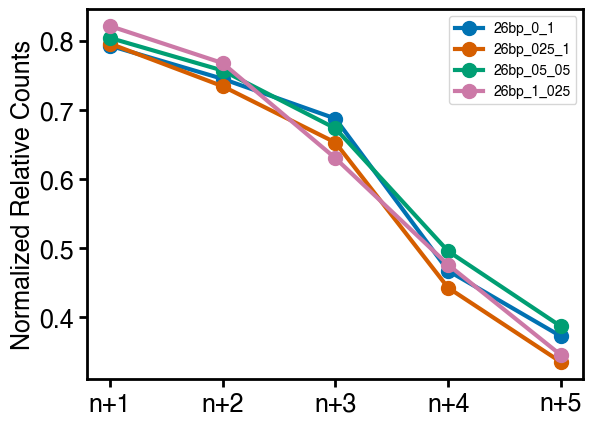

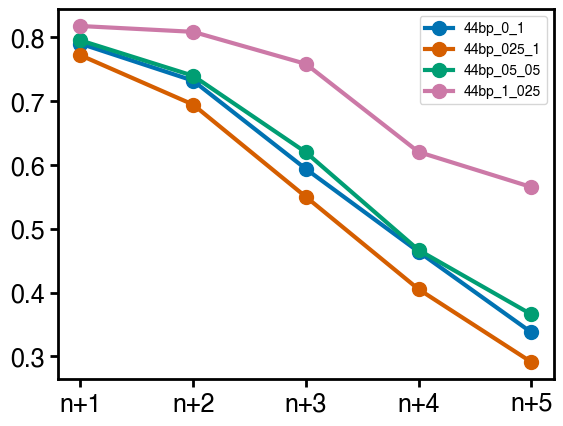

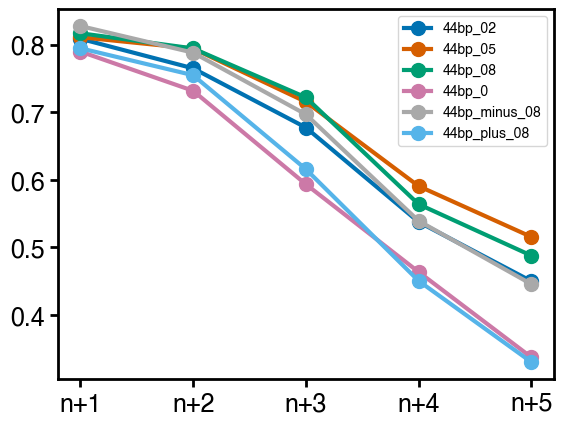

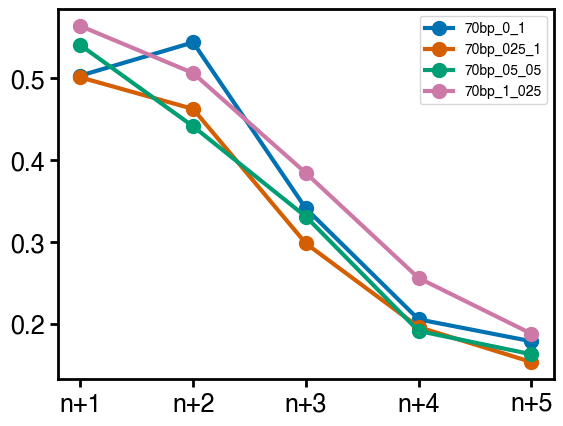

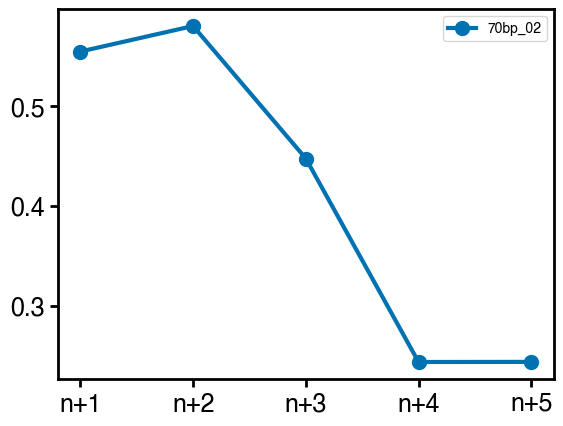

In [11]:
total_snaps = 30
subdirs_modified
fig, ax = plt.subplots()
num_contacts = 5
for cond in range(0,len(subdirs_modified)):
    for traj in range(0,len(end_dirs_modified[cond])):
        dfs_dir = schlick_folder + subdirs_modified[cond] + "/" + end_dirs_modified[cond][traj] + "/dfs/"
        contact_rates_per_snap = np.zeros((total_snaps,num_contacts))
        for i in range(0,total_snaps):
            positions = pd.read_csv(dfs_dir+"flagged_linkers_"+str(i)+"snap.csv")
            contact_rates_per_snap[i,:] = get_contact_rate_curve(positions_df = positions, snapshot = i)
        contact_rate = np.average(contact_rates_per_snap, axis = 0)
        plt.plot(['n+1','n+2','n+3','n+4','n+5'],contact_rate, label = end_dirs_modified[cond][traj], marker = "o") 
        ax.set_ylabel('Normalized Relative Counts')
    plt.legend()
#     plt.savefig(schlick_folder + "micro_c_results/sigmoid_"+subdirs_modified[cond]+".pdf")
    plt.show()

show sigmoid

Text(0, 0.5, 'Contact Prob.')

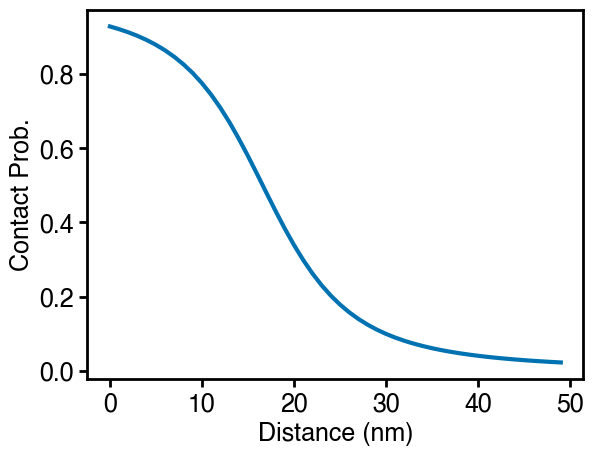

In [12]:
sig_to_plot = [utils.sigmoid(i) for i in range(50)]
fig, ax = plt.subplots()
plt.plot(sig_to_plot)
ax.set_xlabel("Distance (nm)")
ax.set_ylabel("Contact Prob.")
# ax.text(30, 0.8, "Hi", fontsize = "xx-large")
# plt.savefig(schlick_folder + "micro_c_results/sigmoid_applied.pdf")

# Plot Only Distances

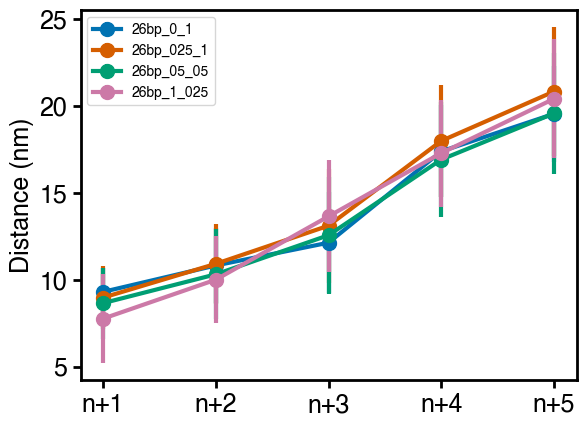

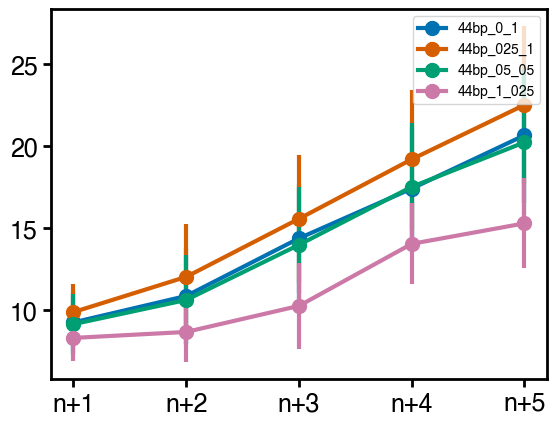

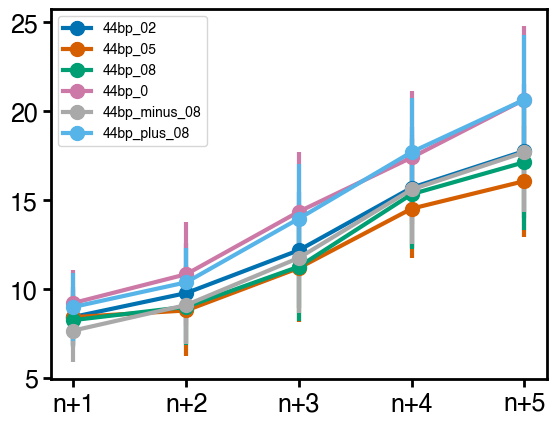

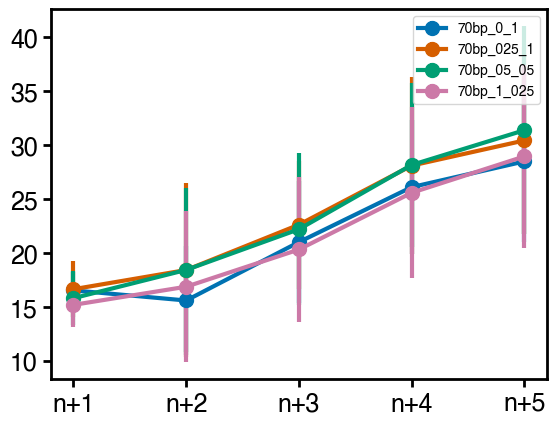

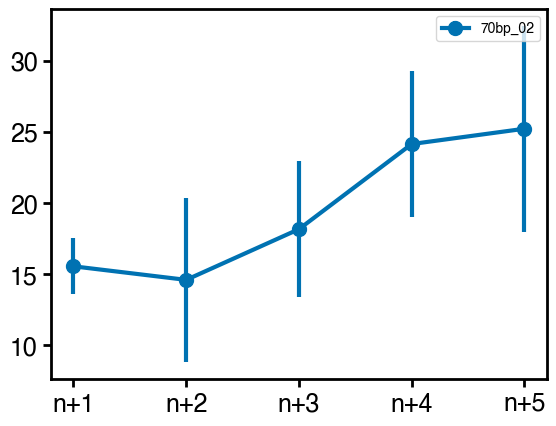

In [13]:
total_snaps = 10
subdirs_modified
fig, ax = plt.subplots()
num_contacts = 5
for cond in range(0,len(subdirs_modified)):
    for traj in range(0,len(end_dirs_modified[cond])):
        dfs_dir = schlick_folder + subdirs_modified[cond] + "/" + end_dirs_modified[cond][traj] + "/dfs/"
        dists_per_snap = np.zeros((total_snaps,num_contacts))
        errs_per_snap = np.zeros((total_snaps,num_contacts))
        for i in range(0,total_snaps):
            positions = pd.read_csv(dfs_dir+"flagged_linkers_"+str(i)+"snap.csv")
            snapshot_dists = get_dists(positions_df = positions, snapshot = i)
            for c in range(0,5):
                dists_per_snap[i,c] = np.average(np.diagonal(snapshot_dists, offset=c+1))
                errs_per_snap[i,c] = np.std(np.diagonal(snapshot_dists, offset=c+1))
        distances = np.average(dists_per_snap, axis = 0)
        errs = np.average(errs_per_snap, axis = 0)
        
        plt.errorbar(['n+1','n+2','n+3','n+4','n+5'],distances, yerr=errs, label = end_dirs_modified[cond][traj], marker = "o") 
        ax.set_ylabel('Distance (nm)')
    plt.legend()
#     plt.savefig(schlick_folder + "micro_c_results/dists_"+subdirs_modified[cond]+".pdf")
    plt.show()

In [ ]:
subdirs_short = subdirs_modified[:3]

In [72]:
# total_snaps = 50
# nucs = 100
# fig, ax = plt.subplots()
# for cond in range(0,len(subdirs_short)):
#     for traj in range(0,len(end_dirs_modified[cond])):
#         dfs_dir = schlick_folder + subdirs_short[cond] + "/" + end_dirs_modified[cond][traj] + "/dfs/"
#         n_n1_dists = np.zeros((total_snaps,nucs - 1))
#         n_n2_dists = np.zeros((total_snaps,nucs - 2))
#         n_n3_dists = np.zeros((total_snaps,nucs - 3))
#         n_n4_dists = np.zeros((total_snaps,nucs - 4))
#         n_n5_dists = np.zeros((total_snaps,nucs - 5))
#         for i in range(0,total_snaps):
#             positions = pd.read_csv(dfs_dir+"flagged_linkers_"+str(i)+"snap.csv")
#             snapshot_dists = get_dists(positions_df = positions, snapshot = i)
#             n_n1_dists[i] = np.diagonal(snapshot_dists, offset=1)
#             n_n2_dists[i] = np.diagonal(snapshot_dists, offset=2)
#             n_n3_dists[i] = np.diagonal(snapshot_dists, offset=3)
#             n_n4_dists[i] = np.diagonal(snapshot_dists, offset=4)
#             n_n5_dists[i] = np.diagonal(snapshot_dists, offset=5)
#         distances = np.array([np.mean(n_n1_dists)
#                               , np.mean(n_n2_dists)
#                               , np.mean(n_n3_dists)
#                               , np.mean(n_n4_dists)
#                               , np.mean(n_n5_dists)])
#         errors = np.array([np.std(n_n1_dists)
#                               , np.std(n_n2_dists)
#                               , np.std(n_n3_dists)
#                               , np.std(n_n4_dists)
#                               , np.std(n_n5_dists)])
#         plt.errorbar(['n+1','n+2','n+3','n+4','n+5'], distances, yerr=errors, label = end_dirs_modified[cond][traj], marker = "o") 
#         plt.legend()
#     plt.show()

In [163]:
end_dirs_limited = [['26bp_0_1', '26bp_1_025'],
 ['44bp_0_1','44bp_1_025'], #  '44bp_025_1', '44bp_05_05', 
 ['44bp_0', '44bp_08'] # , '44bp_minus_08', '44bp_plus_08', '44bp_02', '44bp_05'
 ]

track_labels = [['', ''],
 ['',''], #  '44bp_025_1', '44bp_05_05', 
 ['H1 Low', 'WT'] # , '44bp_minus_08', '44bp_plus_08', '44bp_02', '44bp_05'
 ]

In [191]:
def process_trajectory(dfs_dir, total_snaps, nucs):
    # Use doctionary comprehension to store distances for n+1 to n+5 contacts
    dists = {i: np.zeros((2*total_snaps, nucs - i)) for i in range(1, 6)}
    
    # Collect distances
    for i in range(total_snaps):
        positions = pd.read_csv(f"{dfs_dir}flagged_linkers_{i}snap.csv")
        snapshot_dists_in, snapshot_dists_out = get_tandem_dists(positions_df=positions, snapshot=i)
        for j in range(1, 6):
            dists[j][i] = np.diagonal(snapshot_dists_in, offset=j)
            # Populate right half of array with tandem exit-exit distances
            dists[j][total_snaps + i] = np.diagonal(snapshot_dists_out, offset=j)
    
    # Calculate mean distances and standard deviations
#     distances = np.array([np.mean(dists[i]) for i in range(1, 6)])
#     errors = np.array([np.std(dists[i]) for i in range(1, 6)])
    
    return dists #distances, errors

In [245]:
# define exponential
exp_microc_func = lambda x: np.exp(-x / 10.)

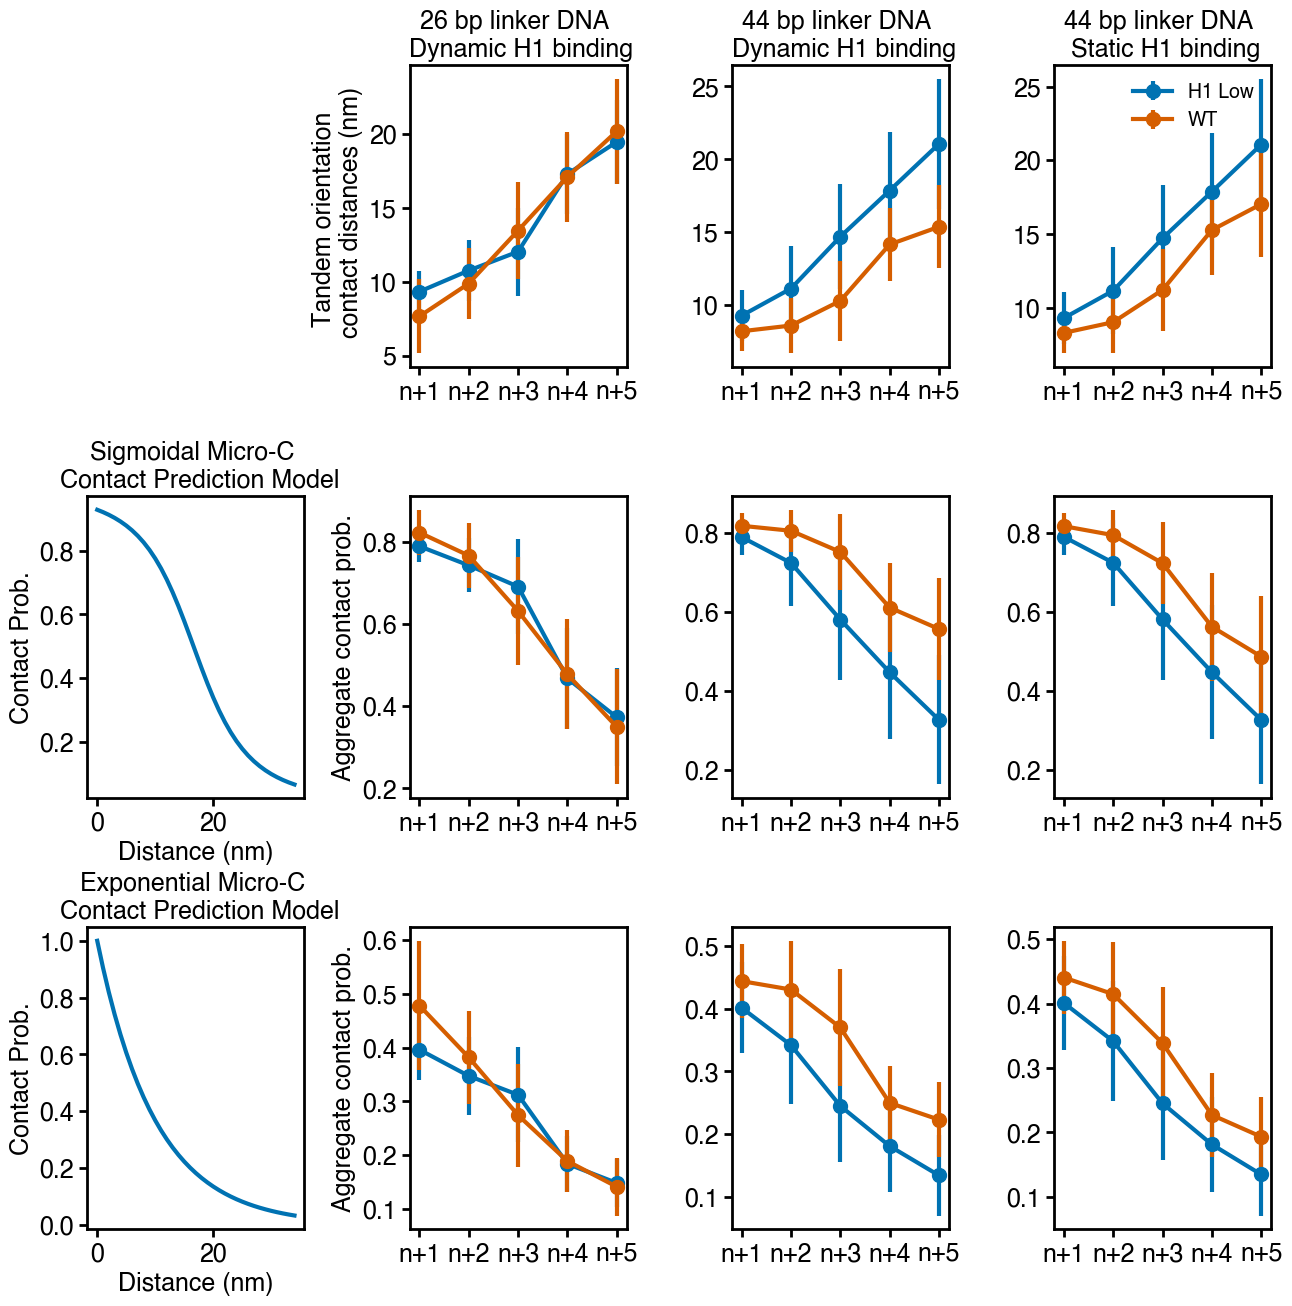

In [251]:
total_snaps = 2 # make 1000 at the end
nucs = 100
fig, ax = plt.subplots(3, 4, figsize=(13, 13), gridspec_kw={'width_ratios': [3, 3, 3, 3]})
exp_length_scale = 9.0

for cond in range(len(subdirs_short)):
#     print(cond)
    for traj in range(len(end_dirs_limited[cond])):
        dfs_dir = f"{schlick_folder}{subdirs_short[cond]}/{end_dirs_limited[cond][traj]}/dfs/"
        dists = process_trajectory(dfs_dir, total_snaps, nucs)
        distances = np.array([np.mean(dists[i]) for i in range(1, 6)])
        errors = np.array([np.std(dists[i]) for i in range(1, 6)])
        
        sigmoid_microc = np.array([np.mean(utils.sigmoid(dists[i])) for i in range(1, 6)])
        sigmoid_microc_errs = np.array([np.std(utils.sigmoid(dists[i])) for i in range(1, 6)])
        
        
#         microc_ecxnp.exp(-dists[i] / exp_length_scale)
        exp_microc =  np.array([np.mean(exp_microc_func(dists[i])) for i in range(1, 6)])
        exp_microc_errs =  np.array([np.std(exp_microc_func(dists[i])) for i in range(1, 6)])
#         
        # Plotting
        ax[0, cond+1].errorbar(['n+1', 'n+2', 'n+3', 'n+4', 'n+5'], distances, yerr=errors, label=track_labels[cond][traj], marker="o")
        ax[1, cond+1].errorbar(['n+1', 'n+2', 'n+3', 'n+4', 'n+5'], sigmoid_microc, yerr=sigmoid_microc_errs, label=track_labels[cond][traj], marker="o")
        ax[2, cond+1].errorbar(['n+1', 'n+2', 'n+3', 'n+4', 'n+5'], exp_microc, yerr=exp_microc_errs, label=track_labels[cond][traj], marker="o")        
#         ax[0, cond+1].legend()


# Plot sigmoid
ax[1,0].set_title('Sigmoidal Micro-C \n Contact Prediction Model')
sig_to_plot = [utils.sigmoid(i) for i in range(35)] 
ax[1,0].plot(sig_to_plot)
ax[1,0].set_xlabel("Distance (nm)")
ax[1,0].set_ylabel("Contact Prob.")
        
# Plot exp 
ax[2,0].set_title('Exponential Micro-C \n Contact Prediction Model')
exp_to_plt = [exp_microc_func(x) for x in range(0,35)]
ax[2,0].plot(exp_to_plt)
ax[2,0].set_xlabel("Distance (nm)")
ax[2,0].set_ylabel("Contact Prob.")    
    
# Label graphs
ax[0,1].set_title('26 bp linker DNA \n Dynamic H1 binding')
ax[0,2].set_title('44 bp linker DNA \n Dynamic H1 binding')
ax[0,3].set_title('44 bp linker DNA \n Static H1 binding')

ax[0,1].set_ylabel('Tandem orientation \n contact distances (nm)')
ax[1,1].set_ylabel("Aggregate contact prob.") 
ax[2,1].set_ylabel("Aggregate contact prob.") 



# Add legend
ax[0, 3].legend(frameon=False, fontsize = 14)

#Hide unneeded plots
ax[0, 0].axis('off')


plt.tight_layout(pad = 0.5)
plt.savefig(plots_dir + 'micro_c/linker_histone_micro_c_plots.pdf')
plt.show()